In [1]:
import pandas as pd
import numpy as np
from statsmodels.robust import mad
import math
import datetime
# import ydata_profiling as ydp
import json
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
warnings.filterwarnings('ignore')

In [2]:
file_path = "C:\\Users\\Deepak Arun\\Desktop\\TWC\Marketing Mix Modeling-selected\\data\\"

In [3]:
# from ADS_Code.ADS_06_02_24_v6 import get_model_date
# from ADS_Code.ADS_13_02_24_1 import get_model_date
from ADS_Code.ADS_14_02_24 import get_model_data
from ADS_Code.ADS_18_03_24 import get_model_data

#### Brand Health Measures Imputation

In [13]:
df_v2 = df_.copy()
hm_back_fill_var = ['Positive impact on community', 'Positive impact on well being']
hm_forward_fill_var = ['Net Favorability', 'Likelihood to recommend', 'Net Trust', 'Realibality', 'Accuracy', 'NPS', 'Usage', 'Preference', 'Seen as experts', 'Positive impact on community', 'Positive impact on well being']
df_v2[hm_back_fill_var] = df_v2[hm_back_fill_var].fillna(method='bfill')
df_v2[hm_forward_fill_var] = df_v2[hm_forward_fill_var].fillna(method='ffill')

Positive impact on community


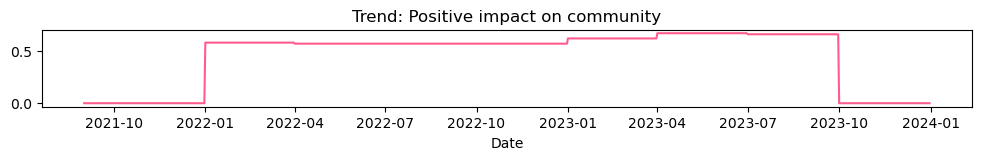

Positive impact on well being


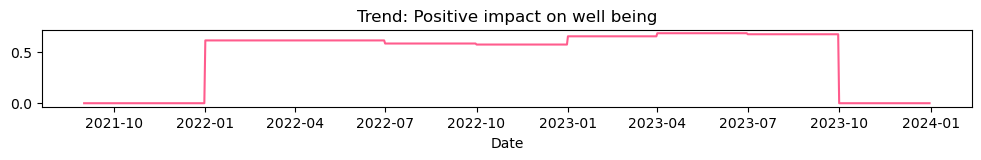

In [14]:
trend_chart_(df_, hm_back_fill_var, hm_back_fill_var, 'Date')

Positive impact on community


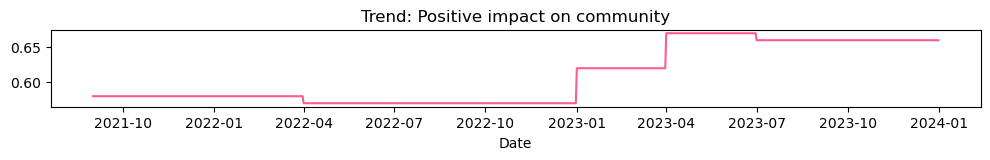

Positive impact on well being


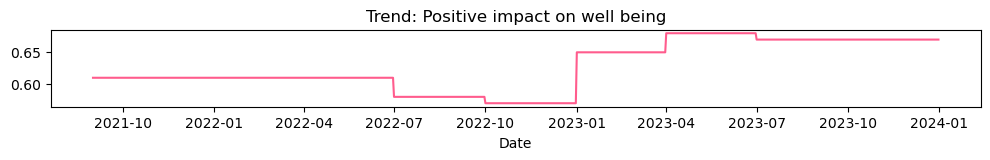

In [15]:
trend_chart_(df_v2, hm_back_fill_var, hm_back_fill_var, 'Date')

In [16]:
df_v2[['Date']+ hm_forward_fill_var].to_clipboard()

In [47]:
list(df_ads.columns[df_ads.isna().sum()==df_ads.shape[0]])

['Likelihood to recommend']

#### Organic Search Imputation 

In [59]:
organic_search_impu = ['OrganicSearch_Google_Clicks', 'OrganicSearch_Google_Impressions', 'OrganicSearch_Google_CTR', 'OrganicSearch_Google_Position', 'SEO_Clicks_OrganicSearch_Desktop_MobileWeb(Combined)']

In [60]:
df_v2_ = df_ads.copy()
# df_v2_['CTR_check'] = df_v2_['OrganicSearch_Google_Clicks']/df_v2_['OrganicSearch_Google_Impressions']
# df_v2_[['Date']+organic_search_impu]
# print(consisten_CTR_for_imputation)

In [150]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\ios groupby.xlsx"  # Update with your actual file path
dfios=pd.read_excel(file_path)

# Ensure the date formats are consistent and convert to datetime
dfios['Date'] = pd.to_datetime(dfios['Date'], format='%d-%m-%Y')


In [153]:
dfios.head(20)

,Date,Media Source (pid),Installs
0,2021-09-01,Apple Search Ads,2394
1,2021-09-01,Apple Search Ads,563
2,2021-09-01,Apple Search Ads,0
3,2021-09-01,Apple Search Ads,95
4,2021-09-01,Apple Search Ads,44
5,2021-09-01,Apple Search Ads,0
6,2021-09-01,Apple Search Ads,97
7,2021-09-01,Apple Search Ads,2
8,2021-09-01,Apple Search Ads,13
9,2021-09-01,Apple Search Ads,240


In [159]:
# Group by 'Media Type' and calculate the sum of 'Value'
grouped_df = dfios.groupby(['Media Source (pid)', 'Date'])['Installs'].sum().reset_index()

In [169]:
sorted_df = grouped_df.sort_values(by=['Date', 'Media Source (pid)']).reset_index(drop=True)

In [234]:
sorted_df.to_clipboard()

In [288]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\ios groupby.xlsx"  # Update with your actual file path
sheet_name = 'Sheet2'  # Update with your actual sheet name 7.6
df1 = pd.read_excel(file_path, sheet_name=sheet_name)


# Ensure the date formats are consistent and convert to datetime
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')



In [289]:
df1.head() 

,Media_source,Date,Installs
0,Apple Search Ads,2021-09-01,4435
1,BurdaOwnedOperated,2021-09-01,0
2,Email,2021-09-01,1
3,EmailSunset,2021-09-01,6
4,HouseBackfill,2021-09-01,0


In [290]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\ios groupby.xlsx"  # Update with your actual file path
sheet_name = 'Sheet3'  # Update with your actual sheet name 7.6
df2 = pd.read_excel(file_path, sheet_name=sheet_name)


# Ensure the date formats are consistent and convert to datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

In [291]:
df2.head()

,Media_source,Date,Installs
0,Apple Search Ads,2021-09-01,4354.0
1,Email,2021-09-01,1.0
2,EmailSunset,2021-09-01,6.0
3,House_MW,2021-09-01,NaN
4,House_StormApp,2021-09-01,NaN


In [292]:
# Merge the DataFrames on 'Media_source' and 'Date'
merged_df = pd.merge(df1, df2, on=['Media_source', 'Date'], how='outer', suffixes=('_new', '_old'))

# Drop the individual install columns to get the final desired output
final_df = merged_df[['Media_source', 'Date']]


In [287]:
merged_df.fillna(0)

,Media_source,Date,Installs_new,Installs_old
0,Apple Search Ads,2021-09-01,4435.0,4354.0
1,BurdaOwnedOperated,2021-09-01,0.0,0.0
2,Email,2021-09-01,1.0,1.0
3,EmailSunset,2021-09-01,6.0,6.0
4,HouseBackfill,2021-09-01,0.0,0.0
...,...,...,...,...
23689,liftoff,2023-09-27,0.0,0.0
23690,organic,2023-09-28,0.0,9476.0
23691,organic,2023-09-29,0.0,10627.0
23692,organic,2023-09-30,0.0,10945.0


In [293]:
ios = merged_df.fillna(0)

In [295]:
ios.tail(20)

,Media_source,Date,Installs_new,Installs_old
23364,liftoff,2023-09-13,0.0,0.0
23365,Thor_Test_Breathing,2023-09-13,0.0,0.0
23366,Thor_Test_Lucas2,2023-09-14,0.0,0.0
23367,Thor_Test_Premium,2023-09-14,0.0,0.0
23368,Thor_Test_NoDL,2023-09-14,0.0,0.0
23369,liftoff,2023-09-14,0.0,0.0
23370,Thor_Test_Breathing,2023-09-14,0.0,0.0
23371,liftoff,2023-09-15,0.0,0.0
23372,Thor_Test_NoDL,2023-09-15,0.0,0.0
23373,liftoff,2023-09-16,0.0,0.0


In [296]:
ios.to_clipboard()

In [252]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\ios groupby.xlsx"  # Update with your actual file path
sheet_name = 'Sheet6'  # Update with your actual sheet name 7.6
dfand = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the date formats are consistent and convert to datetime
#dfand['Date'] = pd.to_datetime(dfand['Date'], format='%d-%m-%Y')


In [230]:
dfand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59645 entries, 0 to 59644
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                59645 non-null  datetime64[ns]
 1   Media Source (pid)  59644 non-null  object        
 2   Installs            59645 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ MB


In [253]:
dfand=dfand.dropna()

In [254]:
dfand['Date'] = pd.to_datetime(dfand['Date'], errors='coerce')  # Use errors='coerce' to handle errors by returning NaT for invalid parsing

In [255]:
dfand['Date'] = pd.to_datetime(dfand['Date'], errors='coerce')  # Use errors='coerce' to handle errors by returning NaT for invalid parsing
if dfand['Date'].isnull().any():
    print("Warning: There are NaN values in the 'Date' column.")
# Group by 'Media Source (pid)' and 'Date' and sum the 'Installs'
grouped_df = dfand.groupby(['Media Source (pid)', 'Date'], as_index=False)['Installs'].sum()

In [256]:
sorted_df = grouped_df.sort_values(by=['Date', 'Media Source (pid)']).reset_index(drop=True)

In [257]:
sorted_df

,Media Source (pid),Date,Installs
0,'wxzyawdffre=wxzyawdffre,2021-09-01,0
1,BurdaOwnedOperated,2021-09-01,0
2,EditorialReferralPM,2021-09-01,0
3,Email,2021-09-01,0
4,EmailSunset,2021-09-01,0
...,...,...,...
28447,moloco_int,2024-05-31,730
28448,personalyrtb_int,2024-05-31,0
28449,sfmc,2024-05-31,0
28450,thevenatic-newsletter,2024-05-31,0


In [266]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\ios groupby.xlsx"  # Update with your actual file path
sheet_name = 'Sheet5'  # Update with your actual sheet name 7.6
df1 = pd.read_excel(file_path, sheet_name=sheet_name)


# Ensure the date formats are consistent and convert to datetime
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')



In [267]:
df1.head()

,Media_source,Date,Installs
0,'wxzyawdffre=wxzyawdffre,2021-09-01,0
1,BurdaOwnedOperated,2021-09-01,0
2,EditorialReferralPM,2021-09-01,0
3,Email,2021-09-01,0
4,EmailSunset,2021-09-01,0


In [268]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\ios groupby.xlsx"  # Update with your actual file path
sheet_name = 'Sheet4'  # Update with your actual sheet name 7.6
df2 = pd.read_excel(file_path, sheet_name=sheet_name)


# Ensure the date formats are consistent and convert to datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

In [269]:
df2.head()

,Media_source,Date,Installs
0,appia_int,2021-09-01,65.0
1,aura_int,2021-09-01,745.0
2,bidease_int,2021-09-01,101.0
3,crossinstall_int,2021-09-01,35.0
4,digitalturbine_int,2021-09-01,958.0


In [270]:
# Merge the DataFrames on 'Media_source' and 'Date'
merged_df = pd.merge(df1, df2, on=['Media_source', 'Date'], how='outer', suffixes=('_new', '_old'))

# Drop the individual install columns to get the final desired output
final_df = merged_df[['Media_source', 'Date']]


In [271]:
andr = merged_df.fillna(0)

In [272]:
andr.tail(20)

,Media_source,Date,Installs_new,Installs_old
28451,tmobile,2024-05-31,979.0,0.0
28452,House,2021-10-29,0.0,0.0
28453,SMS,2021-11-09,0.0,0.0
28454,House,2021-11-10,0.0,0.0
28455,House,2021-11-11,0.0,0.0
28456,Test,2021-11-12,0.0,0.0
28457,House,2021-11-17,0.0,0.0
28458,Test,2021-12-01,0.0,0.0
28459,Test,2021-12-10,0.0,0.0
28460,Test,2022-01-13,0.0,0.0


In [273]:
andr.to_clipboard()

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

def thousands_formatter(x, pos):
    return f'{x / 1e3:,.0f}'

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_=df_.sort_values(by='Date')
    temp=df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date':date_range})
    df_=pd.merge(df_,df_temp_flag,on='Date',how='outer')
    for idx, var in  enumerate(cols):
        print(var)
        df_=df_.fillna(0).reset_index(drop=True)
        plt.figure(figsize=(12, 1.5))
        var_ = var+"_"
        df_[var_] = [val / 1e3 for val in df_[var]]
        df_=df_.sort_values(by='Date')
        sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)
#         sns.regplot(data=df_, x=date_var, y=var, color='#ff5c8d', scatter_kws={'s': 100})
        y = [val / 1e3 for val in df_[var]]
#         y = [val / 1e6 for val in var]
        x = np.arange(len(df_.index))  # Use numerical index as x for regression calculation
#        y = df_[var]
#        print(x)
#        print(y)
        m, b = np.polyfit(x, y, 1)
        plt.plot(df_['Date'], m*x + b)
        pd.DataFrame(df_['Date'], m*x + b).to_clipboard()
        plt.title('Trend: '+chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("In Thousands")
        plt.grid(False)
        plt.show()

Impressions


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


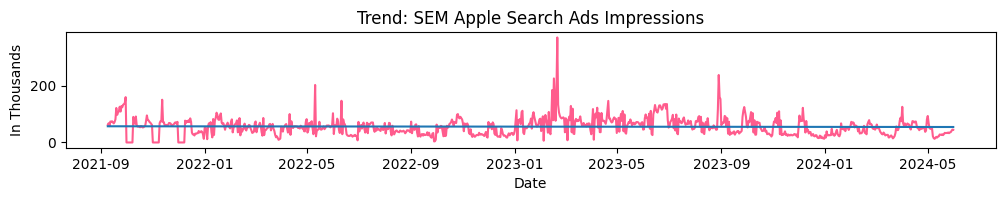

In [51]:
file_path = "C:\\Users\\DeepakArun\\Downloads\\BL_TWC _ Marketing Spend Data (5).xlsx"  # Update with your actual file path
sheet_name = 'Apple Search Ads'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Impressions']
plot_titles = ['SEM Apple Search Ads Impressions']
df['Date'] = pd.to_datetime(df['Day'], format='%d-%m-%Y')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Clicks


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


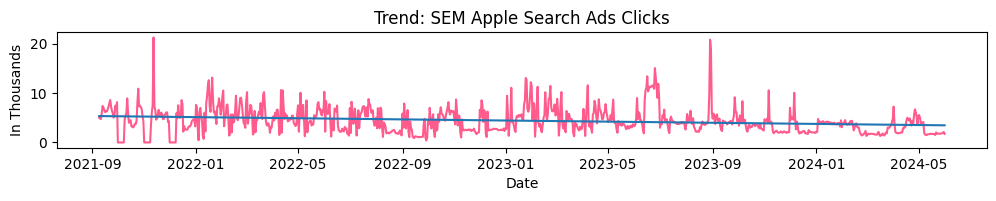

In [52]:
# Define columns to plot and corresponding titles
cols_to_plot = ['Clicks']
plot_titles = ['SEM Apple Search Ads Clicks']
df['Date'] = pd.to_datetime(df['Day'], format='%d-%m-%Y')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Spend


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


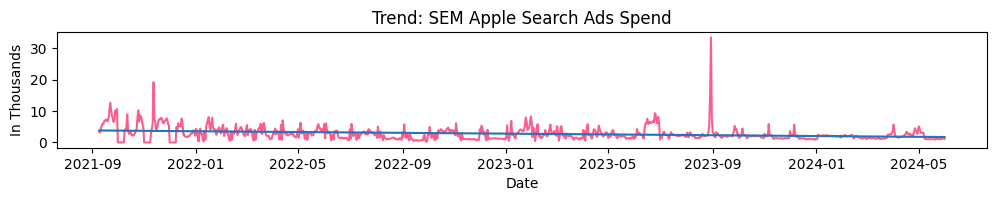

In [53]:
# Define columns to plot and corresponding titles
cols_to_plot = ['Spend']
plot_titles = ['SEM Apple Search Ads Spend']
df['Date'] = pd.to_datetime(df['Day'], format='%d-%m-%Y')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Impressions


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


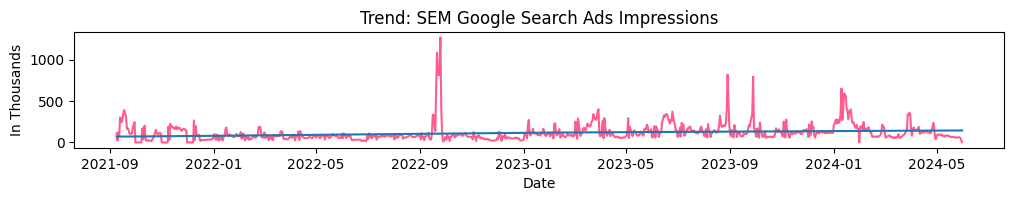

In [54]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\BL\\BL_TWC _ Marketing Spend Data (2).xlsx"  # Update with your actual file path
sheet_name = 'Google'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Impressions']
plot_titles = ['SEM Google Search Ads Impressions']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Clicks


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


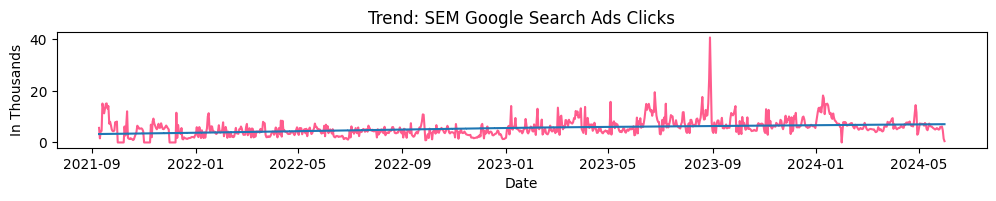

In [64]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\BL\\BL_TWC _ Marketing Spend Data (2).xlsx"  # Update with your actual file path
sheet_name = 'Google'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Clicks']
plot_titles = ['SEM Google Search Ads Clicks']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Spend


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


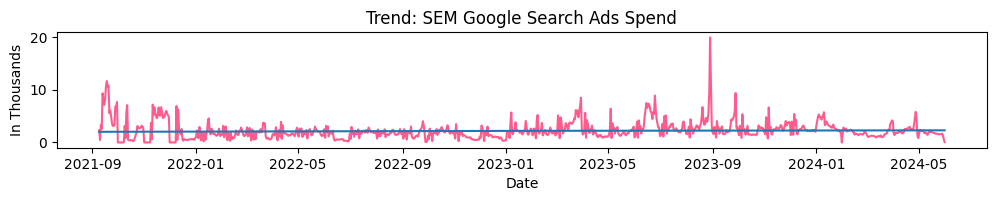

In [56]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\BL\\BL_TWC _ Marketing Spend Data (2).xlsx"  # Update with your actual file path
sheet_name = 'Google'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Spend']
plot_titles = ['SEM Google Search Ads Spend']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Impressions


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


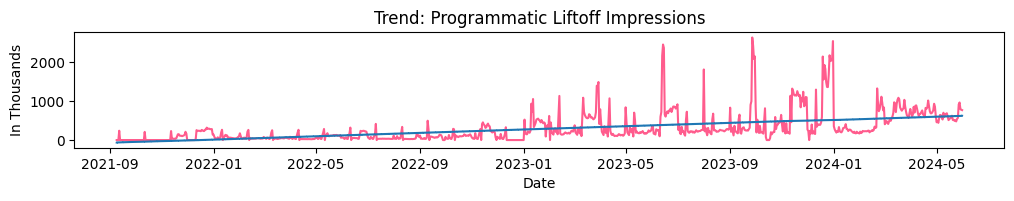

In [22]:
file_path = "C:\\Users\\DeepakArun\\Desktop\\BL\\BL_TWC _ Marketing Spend Data (2).xlsx"  # Update with your actual file path
sheet_name = 'LiftOff'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Impressions']
plot_titles = ['Programmatic Liftoff Impressions']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Spend


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


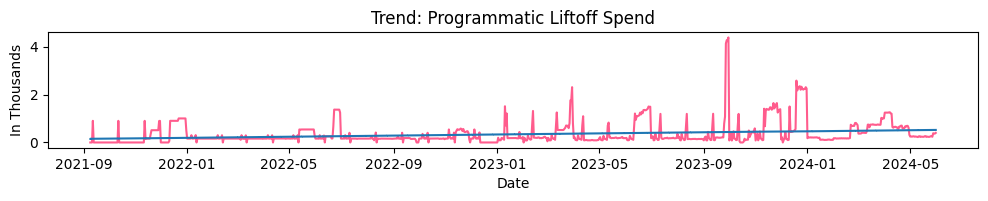

In [23]:
# Define columns to plot and corresponding titles
cols_to_plot = ['Spend']
plot_titles = ['Programmatic Liftoff Spend']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Impressions


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


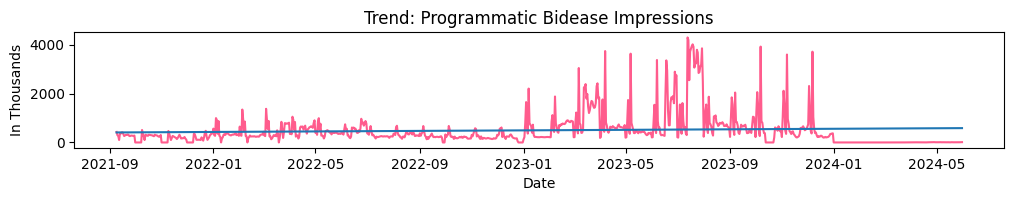

In [60]:
file_path = "C:\\Users\\DeepakArun\\Downloads\\BL_TWC _ Marketing Spend Data (5).xlsx"  # Update with your actual file path
sheet_name = 'Bidease'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Impressions']
plot_titles = ['Programmatic Bidease Impressions']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Clicks


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


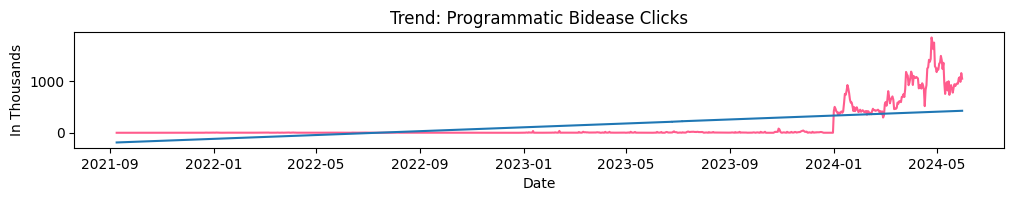

In [26]:
# Define columns to plot and corresponding titles
cols_to_plot = ['Clicks']
plot_titles = ['Programmatic Bidease Clicks']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\642497863.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Spend'] = pd.to_numeric(df['Spend'].str.replace(',', '').str.replace('$', ''), errors='coerce')
C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


Spend


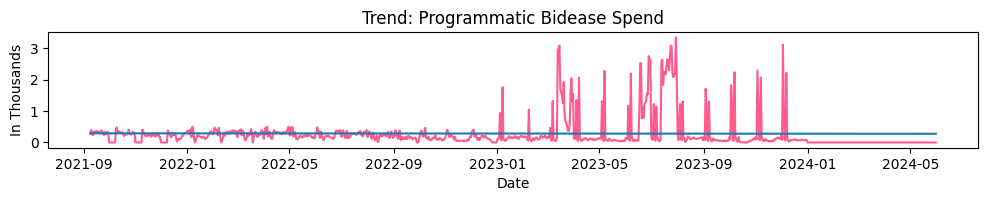

In [29]:
# Define columns to plot and corresponding titles
cols_to_plot = ['Spend']
plot_titles = ['Programmatic Bidease Spend']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df['Spend'] = pd.to_numeric(df['Spend'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


impressions


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


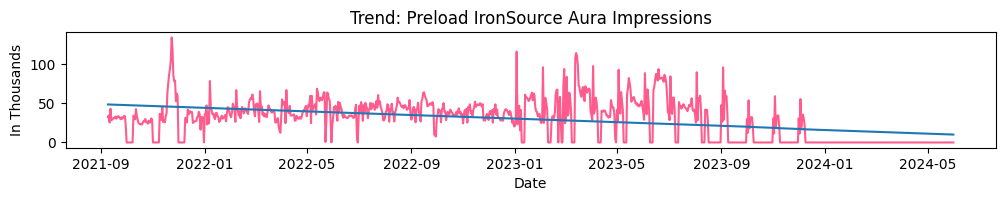

In [65]:
file_path = "C:\\Users\\DeepakArun\\Downloads\\BL_TWC _ Marketing Spend Data (5).xlsx"  # Update with your actual file path
sheet_name = 'IronSource Aura'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['impressions']
plot_titles = ['Preload IronSource Aura Impressions']
df['Date'] = pd.to_datetime(df['event_date'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Spend


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


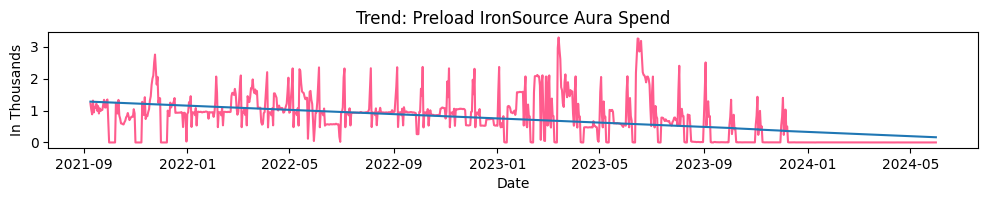

In [66]:
cols_to_plot = ['Spend']
plot_titles = ['Preload IronSource Aura Spend']
df['Date'] = pd.to_datetime(df['event_date'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


launches


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


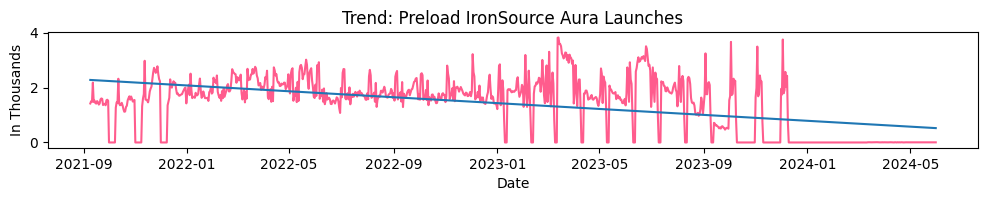

In [36]:
cols_to_plot = ['launches']
plot_titles = ['Preload IronSource Aura Launches']
df['Date'] = pd.to_datetime(df['event_date'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Impressions


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


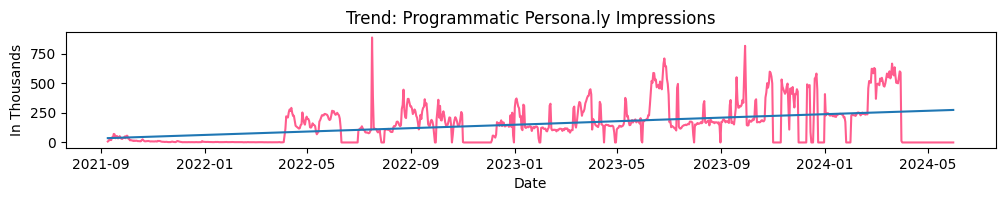

In [67]:
file_path = "C:\\Users\\DeepakArun\\Downloads\\BL_TWC _ Marketing Spend Data (5).xlsx"  # Update with your actual file path
sheet_name = 'Persona.ly'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Impressions']
plot_titles = ['Programmatic Persona.ly Impressions']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
#df['Date'] = pd.to_datetime(df['Day'], format='%d-%m-%Y')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Spend


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


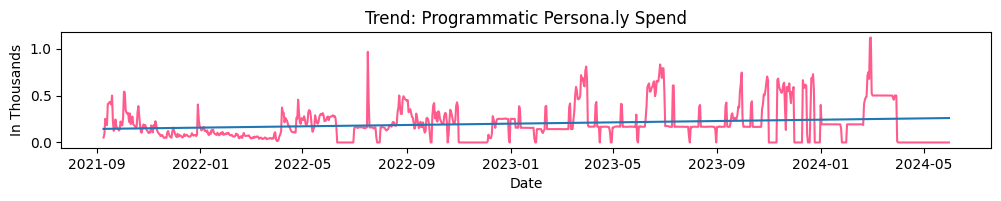

In [68]:
cols_to_plot = ['Spend']
plot_titles = ['Programmatic Persona.ly Spend']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Clicks


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


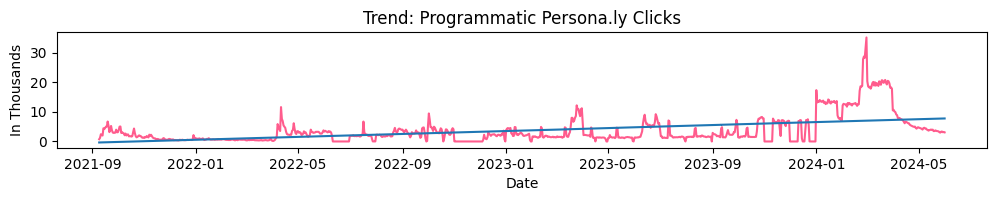

In [69]:
cols_to_plot = ['Clicks']
plot_titles = ['Programmatic Persona.ly Clicks']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
#df['Date'] = pd.to_datetime(df['Day'], format='%d-%m-%Y')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


Spend


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\1365515325.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)


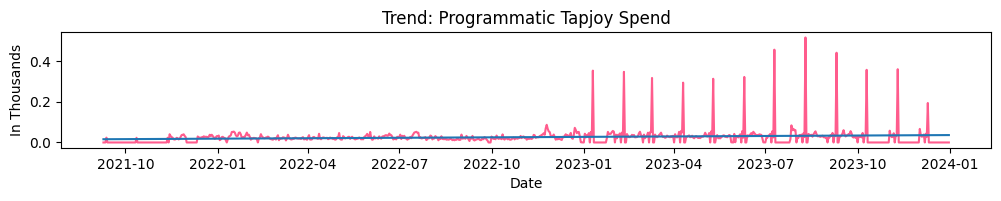

In [70]:
file_path = "C:\\Users\\DeepakArun\\Downloads\\BL_TWC _ Marketing Spend Data (5).xlsx"  # Update with your actual file path
sheet_name = 'Tapjoy'  # Update with your actual sheet name 7.6
df = pd.read_excel(file_path, sheet_name=sheet_name)
# Define columns to plot and corresponding titles
cols_to_plot = ['Spend']
plot_titles = ['Programmatic Tapjoy Spend']
df['Date'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
#df['Date'] = pd.to_datetime(df['Day'], format='%d-%m-%Y')
df = df[df['Date'] >= '2021-09-01']
# Generate trend charts
trend_chart_2(df, cols_to_plot, plot_titles, 'Date')


In [105]:
# User Acquisition - Media Spend, Impression and Clicks
def mkt_media_spend_pre_processing(df_, paid_media_sheet):
    df_columns = list(df_.columns)
    if df_['Spend'].dtypes == 'object':
        df_['Spend'] = df_['Spend'].str.replace(',', '').str.replace('$', '').astype('float')
    if 'clicks' in df_.columns:
            df_=df_.rename({'clicks':'Clicks'},axis=1)
    if 'Clicks' in df_.columns and df_['Clicks'].dtypes == 'object':
        df_['Clicks'] = df_['Clicks'].replace({'\$': ''}, regex=True).replace({'\,': ''}, regex=True)
        df_['Clicks'] = df_['Clicks'].astype('float')
    if paid_media_sheet == 'IronSource Sonic':
        df_=df_.rename({'OS':'event_date', 'Day':'OS'}, axis=1)
    if paid_media_sheet == 'Persona.ly':
        df_=df_[~df_['Platform'].isna()]
    if 'event_date' in list(df_.columns):
        df_=df_.rename({'event_date':'Day'}, axis=1)
    if paid_media_sheet == 'Persona.ly':
        df_['new_date'] = df_['Day']
        df_['format'] = 1
        df_.loc[df_.Day.str.contains('/')==True, 'format'] = 2
        df_.loc[df_.format == 2, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 2, 'Day'], format = '%m/%d/%y').dt.strftime('%Y-%m-%d')
        df_.loc[df_.Date_Issue_flag == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.Date_Issue_flag == 1, 'Day'], format = '%Y-%d-%m %H:%M:%S').dt.strftime('%Y-%m-%d')
        df_.loc[df_.format == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 1, 'Day'], format = '%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
        df_.loc[df_.Date_Issue_flag == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.Date_Issue_flag == 1, 'Day'], format = '%Y-%d-%m %H:%M:%S').dt.strftime('%Y-%m-%d')
        df_ = df_.drop('Date_Issue_flag', axis=1)
    else:
        df_['format'] = 1
        df_.loc[df_.Day.str.contains('/')==True, 'format'] = 2
        df_.loc[df_.format == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 1, 'Day'], format = '%Y-%d-%m %H:%M:%S').dt.strftime('%Y-%m-%d')
        if paid_media_sheet == 'Bidease':
            pattern = r'\b\d{2}/\d{2}/\d{2}\b'
            df_.loc[((df_.format == 2) & (df_.Day.str.contains(pattern, regex=True))), 'format'] = 3
            df_.loc[df_.format == 2, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 2, 'Day'], format = '%m/%d/%Y').dt.strftime('%Y-%m-%d')
            df_.loc[df_.format == 3, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 3, 'Day'], format = '%m/%d/%y').dt.strftime('%Y-%m-%d')
        else:
            df_.loc[df_.format == 2, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 2, 'Day'], format = '%m/%d/%y').dt.strftime('%Y-%m-%d')
    if 'event_date' in df_columns:
        df_=df_.rename({'Day':'event_date'}, axis=1)
        date_var = 'event_date'
    else:
        date_var = 'Day'
    df_[date_var] = df_['new_date']
    df_ = df_.drop(['format', 'new_date'], axis=1)
    return df_, date_var
    
def mkt_media_spend_analyis(file_path, paid_media, data_source_dic):
    df_result = pd.DataFrame(columns=['Date'])
    for paid_media_sheet in paid_media:
        if paid_media_sheet == 'Persona.ly':
            df_ = pd.read_excel(file_path+"BL_TWC _ Marketing Spend Data_v4_revised.xlsx", sheet_name='Persona.ly')
        else:
            df_ = pd.read_excel(file_path+"BL_TWC _ Marketing Spend Data_v3.xlsx", sheet_name=paid_media_sheet)
        df_, date_var = mkt_media_spend_pre_processing(df_, paid_media_sheet)
        df_ = df_.rename({'Day':'Date', 'event_date':'Date'}, axis=1)
        # platform = list(df_['Platform'].unique())
        # os_type = df_['OS'].unique()
        # temp_os_var = ''
        # if len(os_type)==1:
        #     temp_os_var = '_Overall'
        # for os in os_type:
        #     df_grp = df_[df_['OS']==os].reset_index(drop=True)
        #     df_grp['Date']=pd.to_datetime(df_grp['Date'])
        #     df_grp = df_grp.groupby(['Date', 'Platform', 'OS']).sum().reset_index()
        #     df_grp = df_grp.drop(['Platform', 'OS'], axis=1)
        #     df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet]+ "_"+ paid_media_sheet +"_" + os + temp_os_var + "_" + col if col != 'Date' else col for col in df_grp.columns})
        #     df_grp.columns = df_grp.columns.str.replace(' ', '_')
        #     df_grp['Date']=pd.to_datetime(df_grp['Date'])
        #     df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
        # if len(os_type)>1:
        #     df_grp = df_.groupby('Date').sum().reset_index()
        #     df_grp['Date']=pd.to_datetime(df_grp['Date'])
        #     df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet]+ "_"+ paid_media_sheet + "_Overall" + "_" + col if col != 'Date' else col for col in df_grp.columns})
        #     df_grp.columns = df_grp.columns.str.replace(' ', '_')
        #     df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
        df_grp = df_.groupby('Date').sum().reset_index()
        df_grp['Date']=pd.to_datetime(df_grp['Date'])
        df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet]+ "_"+ paid_media_sheet + "_" + col if col != 'Date' else col for col in df_grp.columns})
        df_grp.columns = df_grp.columns.str.replace(' ', '_')
        df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
    return df_result

def get_model_user_acquisition_mkt_media_spend(file_path):
    paid_media = ['Google', 'IronSource Aura', 'Bidease', 'Digital Turbine', 'Tapjoy', 'Apple Search Ads', 'LiftOff', 'IronSource Sonic', 'Twitter', 'TikTok', 'Vibe', 'Persona.ly']
    data_source_dic = {'Google':'SEM',
                       'IronSource Aura':'Preload',
                       'Bidease':'Programmatic',
                       'Digital Turbine':'Preload',
                       'Tapjoy':'Programmatic',
                       'Apple Search Ads':'SEM',
                       'LiftOff':'Programmatic',
                       'IronSource Sonic':'Programmatic',
                       'Twitter':'PaidSocial',
                       'TikTok':'Programmatic',
                       'Vibe':'PaidSocial',
                       'Persona.ly':'Programmatic'
                      }
    df_ = mkt_media_spend_analyis(file_path, paid_media, data_source_dic)
    return df_


In [107]:
# Assuming you have already defined the functions above

# Set the file path to your Excel files
file_path = "C:\\Users\\DeepakArun\\Desktop\\TWC\\Data\\"

# Call the function to get the processed data
df_result = get_model_user_acquisition_mkt_media_spend(file_path)

# Display the resulting DataFrame
print(df_result)


          Date  SEM_Google_Spend  SEM_Google_Clicks  SEM_Google_Impressions  \
0   2021-09-01        3804.96239               9901                  188201   
1   2021-09-02        1956.52158               5170                  111238   
2   2021-09-03        1750.51233               4550                   92859   
3   2021-09-04        1772.30789               4723                   93066   
4   2021-09-05        1881.71183               5030                   96904   
..         ...               ...                ...                     ...   
847 2023-12-27        2368.73262               6601                  127890   
848 2023-12-28        2154.44853               6282                  115165   
849 2023-12-29        2391.16549               6309                  132374   
850 2023-12-30        2218.96271               6205                  116414   
851 2023-12-31        2033.16337               5599                  117379   

     Preload_IronSource_Aura_Spend  Preload_IronSou

In [109]:
df_result.to_clipboard()

In [78]:
# User Acquisition - Media Spend, Impression and Clicks
def mkt_media_spend_pre_processing(df_, paid_media_sheet):
    df_columns = list(df_.columns)
    if df_['Spend'].dtypes == 'object':
        df_['Spend'] = df_['Spend'].str.replace(',', '').str.replace('$', '').astype('float')
    if 'clicks' in df_.columns:
            df_=df_.rename({'clicks':'Clicks'},axis=1)
    if 'Clicks' in df_.columns and df_['Clicks'].dtypes == 'object':
        df_['Clicks'] = df_['Clicks'].replace({'\$': ''}, regex=True).replace({'\,': ''}, regex=True)
        df_['Clicks'] = df_['Clicks'].astype('float')
    if paid_media_sheet == 'IronSource Sonic':
        df_=df_.rename({'OS':'event_date', 'Day':'OS'}, axis=1)
    if paid_media_sheet == 'Persona.ly':
        df_=df_[~df_['Platform'].isna()]
    if 'event_date' in list(df_.columns):
        df_=df_.rename({'event_date':'Day'}, axis=1)
    if paid_media_sheet == 'Persona.ly':
        df_['new_date'] = df_['Day']
        df_['format'] = 1
        df_.loc[df_.Day.str.contains('/')==True, 'format'] = 2
        df_.loc[df_.format == 2, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 2, 'Day'], format = '%m/%d/%y').dt.strftime('%Y-%m-%d')
        df_.loc[df_.Date_Issue_flag == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.Date_Issue_flag == 1, 'Day'], format = '%Y-%d-%m %H:%M:%S').dt.strftime('%Y-%m-%d')
        df_.loc[df_.format == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 1, 'Day'], format = '%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
        df_.loc[df_.Date_Issue_flag == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.Date_Issue_flag == 1, 'Day'], format = '%Y-%d-%m %H:%M:%S').dt.strftime('%Y-%m-%d')
        df_ = df_.drop('Date_Issue_flag', axis=1)
    else:
        df_['format'] = 1
        df_.loc[df_.Day.str.contains('/')==True, 'format'] = 2
        df_.loc[df_.format == 1, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 1, 'Day'], format = '%Y-%d-%m %H:%M:%S').dt.strftime('%Y-%m-%d')
        if paid_media_sheet == 'Bidease':
            pattern = r'\b\d{2}/\d{2}/\d{2}\b'
            df_.loc[((df_.format == 2) & (df_.Day.str.contains(pattern, regex=True))), 'format'] = 3
            df_.loc[df_.format == 2, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 2, 'Day'], format = '%m/%d/%Y').dt.strftime('%Y-%m-%d')
            df_.loc[df_.format == 3, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 3, 'Day'], format = '%m/%d/%y').dt.strftime('%Y-%m-%d')
        else:
            df_.loc[df_.format == 2, 'new_date'] = pd.to_datetime(df_.loc[df_.format == 2, 'Day'], format = '%m/%d/%y').dt.strftime('%Y-%m-%d')
    if 'event_date' in df_columns:
        df_=df_.rename({'Day':'event_date'}, axis=1)
        date_var = 'event_date'
    else:
        date_var = 'Day'
    df_[date_var] = df_['new_date']
    df_ = df_.drop(['format', 'new_date'], axis=1)
    return df_, date_var
    
def mkt_media_spend_analyis(file_path, paid_media, data_source_dic):
    df_result = pd.DataFrame(columns=['Date'])
    for paid_media_sheet in paid_media:
        if paid_media_sheet == 'Persona.ly':
            df_ = pd.read_excel(file_path+"BL_TWC _ Marketing Spend Data (6).xlsx", sheet_name='Persona.ly')
        else:
            df_ = pd.read_excel(file_path+"BL_TWC _ Marketing Spend Data (6).xlsx", sheet_name=paid_media_sheet)
        df_, date_var = mkt_media_spend_pre_processing(df_, paid_media_sheet)
        df_ = df_.rename({'Day':'Date', 'event_date':'Date'}, axis=1)
        # platform = list(df_['Platform'].unique())
        # os_type = df_['OS'].unique()
        # temp_os_var = ''
        # if len(os_type)==1:
        #     temp_os_var = '_Overall'
        # for os in os_type:
        #     df_grp = df_[df_['OS']==os].reset_index(drop=True)
        #     df_grp['Date']=pd.to_datetime(df_grp['Date'])
        #     df_grp = df_grp.groupby(['Date', 'Platform', 'OS']).sum().reset_index()
        #     df_grp = df_grp.drop(['Platform', 'OS'], axis=1)
        #     df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet]+ "_"+ paid_media_sheet +"_" + os + temp_os_var + "_" + col if col != 'Date' else col for col in df_grp.columns})
        #     df_grp.columns = df_grp.columns.str.replace(' ', '_')
        #     df_grp['Date']=pd.to_datetime(df_grp['Date'])
        #     df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
        # if len(os_type)>1:
        #     df_grp = df_.groupby('Date').sum().reset_index()
        #     df_grp['Date']=pd.to_datetime(df_grp['Date'])
        #     df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet]+ "_"+ paid_media_sheet + "_Overall" + "_" + col if col != 'Date' else col for col in df_grp.columns})
        #     df_grp.columns = df_grp.columns.str.replace(' ', '_')
        #     df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
        df_grp = df_.groupby('Date').sum().reset_index()
        df_grp['Date']=pd.to_datetime(df_grp['Date'])
        df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet]+ "_"+ paid_media_sheet + "_" + col if col != 'Date' else col for col in df_grp.columns})
        df_grp.columns = df_grp.columns.str.replace(' ', '_')
        df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
    return df_result

def get_model_user_acquisition_mkt_media_spend(file_path):
    paid_media = ['Google', 'IronSource Aura', 'Bidease', 'Digital Turbine', 'Tapjoy', 'Apple Search Ads', 'LiftOff', 'IronSource Sonic', 'Twitter', 'TikTok', 'Vibe', 'Persona.ly']
    data_source_dic = {'Google':'SEM',
                       'IronSource Aura':'Preload',
                       'Bidease':'Programmatic',
                       'Digital Turbine':'Preload',
                       'Tapjoy':'Programmatic',
                       'Apple Search Ads':'SEM',
                       'LiftOff':'Programmatic',
                       'IronSource Sonic':'Programmatic',
                       'Twitter':'PaidSocial',
                       'TikTok':'Programmatic',
                       'Vibe':'PaidSocial',
                       'Persona.ly':'Programmatic'
                      }
    df_ = mkt_media_spend_analyis(file_path, paid_media, data_source_dic)
    return df_


In [79]:
# Assuming you have already defined the functions above

# Set the file path to your Excel files
file_path = "C:\\Users\\DeepakArun\\Desktop\\TWC\\Data"

# Call the function to get the processed data
df_result = get_model_user_acquisition_mkt_media_spend(file_path)

# Display the resulting DataFrame
print(df_result)


ValueError: time data '2024-01-13 00:00:00' does not match format '%Y-%d-%m %H:%M:%S' (match)

In [74]:
df_result

,Date,SEM_Google_Spend,SEM_Google_Clicks,SEM_Google_Impressions,Preload_IronSource_Aura_Spend,Preload_IronSource_Aura_launches,Preload_IronSource_Aura_impressions,Preload_IronSource_Aura_app_downloads,Programmatic_Bidease_Spend,Programmatic_Bidease_Clicks,...,PaidSocial_Twitter_Impressions,Programmatic_TikTok_Spend,Programmatic_TikTok_Clicks,Programmatic_TikTok_Impressions,PaidSocial_Vibe_Spend,PaidSocial_Vibe_Clicks,PaidSocial_Vibe_Impressions,Programmatic_Persona.ly_Spend,Programmatic_Persona.ly_Clicks,Programmatic_Persona.ly_Impressions
0,2021-09-01,3804.96239,9901,188201,624.10,1327.0,26044.0,2657.0,83.95,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-02,1956.52158,5170,111238,919.24,1286.0,39147.0,3625.0,69.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-03,1750.51233,4550,92859,914.55,1245.0,39039.0,3572.0,109.25,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-04,1772.30789,4723,93066,927.03,1315.0,34922.0,3581.0,96.60,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-05,1881.71183,5030,96904,676.35,1365.0,29773.0,2464.0,88.55,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2023-12-27,2368.73262,6601,127890,NaN,NaN,NaN,NaN,74.75,551.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0.0
848,2023-12-28,2154.44853,6282,115165,NaN,NaN,NaN,NaN,67.85,694.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
849,2023-12-29,2391.16549,6309,132374,NaN,NaN,NaN,NaN,71.30,705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
850,2023-12-30,2218.96271,6205,116414,NaN,NaN,NaN,NaN,86.25,734.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [86]:
import pandas as pd
from dateutil.parser import parse

def try_parsing_date(text):
    for fmt in ('%Y-%m-%d %H:%M:%S', '%m/%d/%y', '%d/%m/%Y', '%m/%d/%Y', '%Y-%d-%m %H:%M:%S'):
        try:
            return pd.to_datetime(text, format=fmt).strftime('%Y-%m-%d')
        except ValueError:
            continue
    return text

def mkt_media_spend_pre_processing(df_, paid_media_sheet):
    df_columns = list(df_.columns)
    if df_['Spend'].dtypes == 'object':
        df_['Spend'] = df_['Spend'].str.replace(',', '').str.replace('$', '').astype('float')
    if 'clicks' in df_.columns:
        df_ = df_.rename({'clicks': 'Clicks'}, axis=1)
    if 'Clicks' in df_.columns and df_['Clicks'].dtypes == 'object':
        df_['Clicks'] = df_['Clicks'].replace({'\$': ''}, regex=True).replace({'\,': ''}, regex=True)
        df_['Clicks'] = df_['Clicks'].astype('float')
    if paid_media_sheet == 'IronSource Sonic':
        df_ = df_.rename({'OS': 'event_date', 'Day': 'OS'}, axis=1)
    if paid_media_sheet == 'Persona.ly':
        df_ = df_[~df_['Platform'].isna()]
    if 'event_date' in list(df_.columns):
        df_ = df_.rename({'event_date': 'Day'}, axis=1)

    df_['Day'] = df_['Day'].astype(str)  # Ensure 'Day' column is string type
    df_['new_date'] = df_['Day'].apply(try_parsing_date)
    
    if 'event_date' in df_columns:
        df_ = df_.rename({'Day': 'event_date'}, axis=1)
        date_var = 'event_date'
    else:
        date_var = 'Day'
    
    df_[date_var] = df_['new_date']
    df_ = df_.drop(['new_date'], axis=1)
    return df_, date_var

def mkt_media_spend_analyis(file_path, paid_media, data_source_dic):
    df_result = pd.DataFrame(columns=['Date'])
    for paid_media_sheet in paid_media:
        df_ = pd.read_excel(file_path, sheet_name=paid_media_sheet)
        df_, date_var = mkt_media_spend_pre_processing(df_, paid_media_sheet)
        df_ = df_.rename({'Day': 'Date', 'event_date': 'Date'}, axis=1)
        df_grp = df_.groupby('Date').sum().reset_index()
        df_grp['Date'] = pd.to_datetime(df_grp['Date'])
        df_grp = df_grp.rename(columns={col: data_source_dic[paid_media_sheet] + "_" + paid_media_sheet + "_" + col if col != 'Date' else col for col in df_grp.columns})
        df_grp.columns = df_grp.columns.str.replace(' ', '_')
        df_result = pd.merge(df_result, df_grp, on='Date', how='outer')
    return df_result

def get_model_user_acquisition_mkt_media_spend(file_path):
    paid_media = ['Google', 'IronSource Aura', 'Bidease', 'Digital Turbine', 'Tapjoy', 'Apple Search Ads', 'LiftOff', 'IronSource Sonic', 'Twitter', 'TikTok', 'Vibe', 'Persona.ly']
    data_source_dic = {'Google': 'SEM',
                       'IronSource Aura': 'Preload',
                       'Bidease': 'Programmatic',
                       'Digital Turbine': 'Preload',
                       'Tapjoy': 'Programmatic',
                       'Apple Search Ads': 'SEM',
                       'LiftOff': 'Programmatic',
                       'IronSource Sonic': 'Programmatic',
                       'Twitter': 'PaidSocial',
                       'TikTok': 'Programmatic',
                       'Vibe': 'PaidSocial',
                       'Persona.ly': 'Programmatic'
                      }
    df_ = mkt_media_spend_analyis(file_path, paid_media, data_source_dic)
    return df_


In [87]:
# Example usage:
file_path = "C:\\Users\\DeepakArun\\Downloads\\BL_TWC _ Marketing Spend Data (6).xlsx"
df_result = get_model_user_acquisition_mkt_media_spend(file_path)
print(df_result.head())

C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\473878874.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grp = df_.groupby('Date').sum().reset_index()
C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\473878874.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grp = df_.groupby('Date').sum().reset_index()
C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\473878874.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_['S

        Date  SEM_Google_Spend  SEM_Google_Clicks  SEM_Google_Impressions  \
0 2021-01-09        3804.96239             9901.0                188201.0   
1 2021-01-10        6147.16188             7982.0                202151.0   
2 2021-01-11        4648.76722             7638.0                168203.0   
3 2021-01-12        9480.57502            10005.0                276677.0   
4 2021-02-09        1956.52158             5170.0                111238.0   

   Preload_IronSource_Aura_Spend  Preload_IronSource_Aura_launches  \
0                         624.10                            1327.0   
1                         947.67                            1416.0   
2                         634.50                            1267.0   
3                        1278.49                            1970.0   
4                         919.24                            1286.0   

   Preload_IronSource_Aura_impressions  Preload_IronSource_Aura_app_downloads  \
0                              2604

C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_20148\473878874.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grp = df_.groupby('Date').sum().reset_index()


In [93]:
df_result.to_clipboard()

In [92]:
# Get and sort the unique dates in the df_result DataFrame
sorted_unique_dates = sorted(df_result['Date'].unique())

# Print the sorted unique dates
print(sorted_unique_dates)

[numpy.datetime64('2021-01-09T00:00:00.000000000'), numpy.datetime64('2021-01-10T00:00:00.000000000'), numpy.datetime64('2021-01-11T00:00:00.000000000'), numpy.datetime64('2021-01-12T00:00:00.000000000'), numpy.datetime64('2021-02-09T00:00:00.000000000'), numpy.datetime64('2021-02-10T00:00:00.000000000'), numpy.datetime64('2021-02-11T00:00:00.000000000'), numpy.datetime64('2021-02-12T00:00:00.000000000'), numpy.datetime64('2021-03-09T00:00:00.000000000'), numpy.datetime64('2021-03-10T00:00:00.000000000'), numpy.datetime64('2021-03-11T00:00:00.000000000'), numpy.datetime64('2021-03-12T00:00:00.000000000'), numpy.datetime64('2021-04-09T00:00:00.000000000'), numpy.datetime64('2021-04-10T00:00:00.000000000'), numpy.datetime64('2021-04-11T00:00:00.000000000'), numpy.datetime64('2021-04-12T00:00:00.000000000'), numpy.datetime64('2021-05-09T00:00:00.000000000'), numpy.datetime64('2021-05-10T00:00:00.000000000'), numpy.datetime64('2021-05-11T00:00:00.000000000'), numpy.datetime64('2021-05-12T0

In [111]:
df_useracq = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\User Acquisition data.xlsx")

In [112]:
df_useracq=df_useracq.fillna(0)

In [113]:
df_useracq['Twitter & TikTok Combined Spend'] = df_useracq['PaidSocial_Twitter_Spend'] + df_useracq['Programmatic_TikTok_Spend']
df_useracq['Twitter & TikTok Combined Clicks'] = df_useracq['PaidSocial_Twitter_Clicks'] + df_useracq['Programmatic_TikTok_Clicks']
df_useracq['Twitter & TikTok Combined Impressions'] = df_useracq['PaidSocial_Twitter_Impressions'] + df_useracq['Programmatic_TikTok_Impressions']

In [119]:
df_useracq

,Date,SEM_Google_Spend,SEM_Google_Clicks,SEM_Google_Impressions,Preload_IronSource_Aura_Spend,Preload_IronSource_Aura_launches,Preload_IronSource_Aura_impressions,Preload_IronSource_Aura_app_downloads,Programmatic_Bidease_Spend,Programmatic_Bidease_Clicks,...,Programmatic_TikTok_Impressions,PaidSocial_Vibe_Spend,PaidSocial_Vibe_Clicks,PaidSocial_Vibe_Impressions,Programmatic_Persona.ly_Spend,Programmatic_Persona.ly_Clicks,Programmatic_Persona.ly_Impressions,Twitter & TikTok Combined Spend,Twitter & TikTok Combined Clicks,Twitter & TikTok Combined Impressions
0,2021-09-01,3804.96239,9901.0,188201.0,624.100,1327.0,26044.0,2657.0,83.9500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-02,1956.52158,5170.0,111238.0,919.240,1286.0,39147.0,3625.0,69.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-03,1750.51233,4550.0,92859.0,914.550,1245.0,39039.0,3572.0,109.2500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-04,1772.30789,4723.0,93066.0,927.030,1315.0,34922.0,3581.0,96.6000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-05,1881.71183,5030.0,96904.0,676.350,1365.0,29773.0,2464.0,88.5500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2024-05-27,1588.62000,5939.0,61598.0,1.215,9.0,1.0,0.0,342.5684,1050340.0,...,0.0,0.0,0.0,0.0,0.0,3337.0,0.0,0.0,0.0,0.0
1000,2024-05-28,1693.09000,6193.0,61968.0,1.338,7.0,1.0,0.0,323.5924,1073381.0,...,0.0,0.0,0.0,0.0,0.0,3335.0,1.0,0.0,0.0,0.0
1001,2024-05-29,1375.92000,4638.0,52527.0,0.832,7.0,1.0,1.0,410.5518,985535.0,...,0.0,0.0,0.0,0.0,0.0,3117.0,1.0,0.0,0.0,0.0
1002,2024-05-30,607.03000,1470.0,22529.0,0.607,3.0,3.0,0.0,455.5616,1154109.0,...,0.0,0.0,0.0,0.0,0.0,3215.0,1.0,0.0,0.0,0.0


In [115]:
df_useracq.columns

Index(['Date', 'SEM_Google_Spend', 'SEM_Google_Clicks',
       'SEM_Google_Impressions', 'Preload_IronSource_Aura_Spend',
       'Preload_IronSource_Aura_launches',
       'Preload_IronSource_Aura_impressions',
       'Preload_IronSource_Aura_app_downloads', 'Programmatic_Bidease_Spend',
       'Programmatic_Bidease_Clicks', 'Programmatic_Bidease_Impressions',
       'Preload_Digital_Turbine_Spend', 'Preload_Digital_Turbine_launches',
       'Preload_Digital_Turbine_impressions',
       'Preload_Digital_Turbine_app_downloads', 'Programmatic_Tapjoy_Spend',
       'Programmatic_Tapjoy_Clicks', 'Programmatic_Tapjoy_Impressions',
       'SEM_Apple_Search_Ads_Spend', 'SEM_Apple_Search_Ads_Clicks',
       'SEM_Apple_Search_Ads_Impressions', 'Programmatic_LiftOff_Spend',
       'Programmatic_LiftOff_Clicks', 'Programmatic_LiftOff_Impressions',
       'Programmatic_IronSource_Sonic_Spend',
       'Programmatic_IronSource_Sonic_Clicks',
       'Programmatic_IronSource_Sonic_Impressions', 'PaidS

In [116]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

def thousands_formatter(x, pos):
    return f'{x / 1e3:,.0f}'

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_=df_.sort_values(by='Date')
    temp=df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date':date_range})
    df_=pd.merge(df_,df_temp_flag,on='Date',how='outer')
    for idx, var in  enumerate(cols):
        print(var)
        df_=df_.fillna(0).reset_index(drop=True)
        plt.figure(figsize=(12, 1.5))
        var_ = var+"_"
        df_[var_] = [val / 1e3 for val in df_[var]]
        df_=df_.sort_values(by='Date')
        sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)
#         sns.regplot(data=df_, x=date_var, y=var, color='#ff5c8d', scatter_kws={'s': 100})
        y = [val / 1e3 for val in df_[var]]
#         y = [val / 1e6 for val in var]
        x = np.arange(len(df_.index))  # Use numerical index as x for regression calculation
#        y = df_[var]
#        print(x)
#        print(y)
        m, b = np.polyfit(x, y, 1)
        plt.plot(df_['Date'], m*x + b)
        pd.DataFrame(df_['Date'], m*x + b).to_clipboard()
        plt.title('Trend: '+chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("In Thousands")
        plt.grid(False)
        plt.show()

SEM_Google_Spend


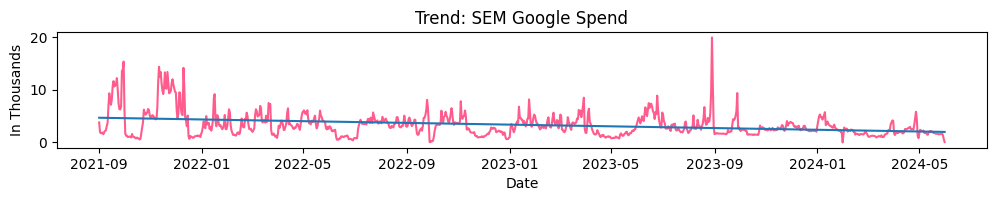

SEM_Google_Clicks


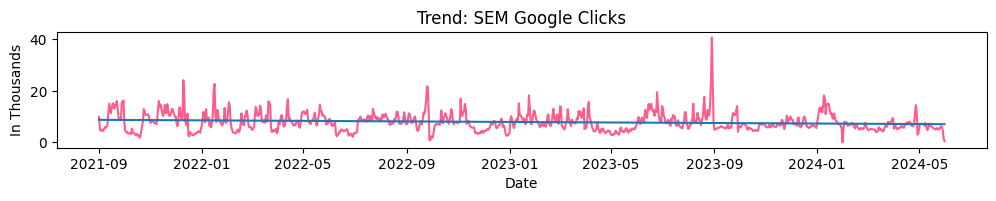

SEM_Google_Impressions


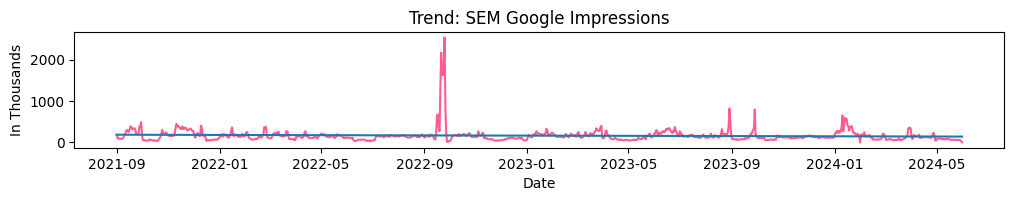

Preload_IronSource_Aura_Spend


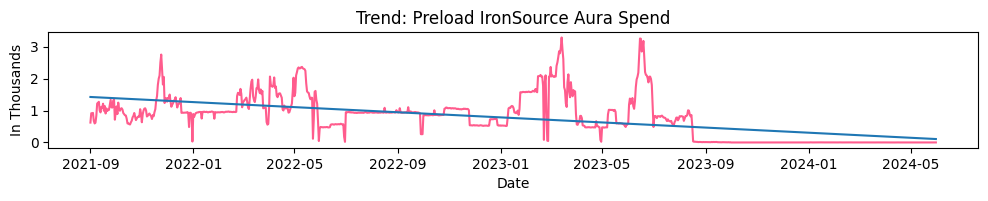

Preload_IronSource_Aura_launches


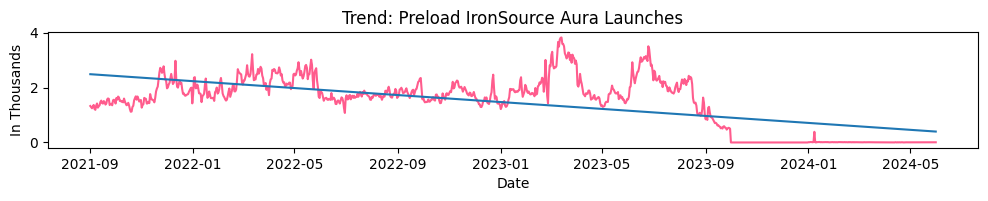

Preload_IronSource_Aura_impressions


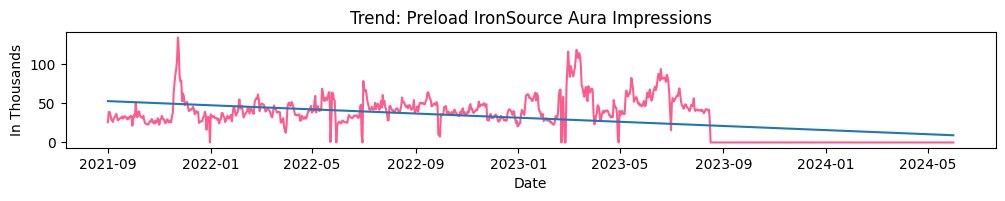

Preload_IronSource_Aura_app_downloads


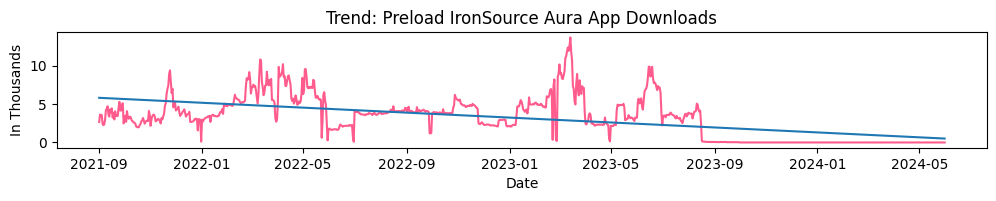

Programmatic_Bidease_Spend


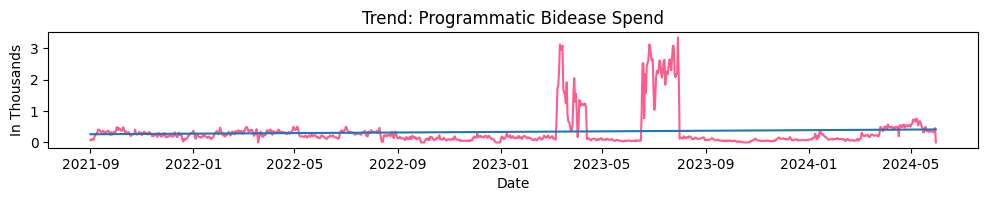

Programmatic_Bidease_Clicks


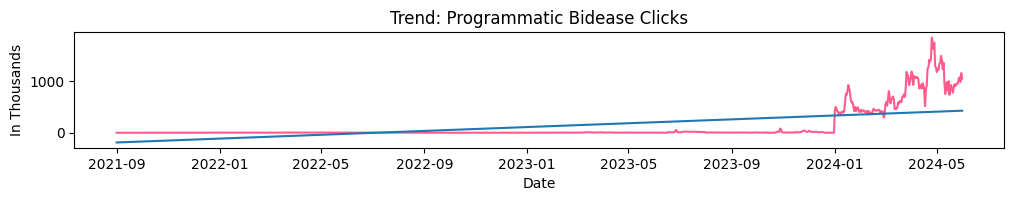

Programmatic_Bidease_Impressions


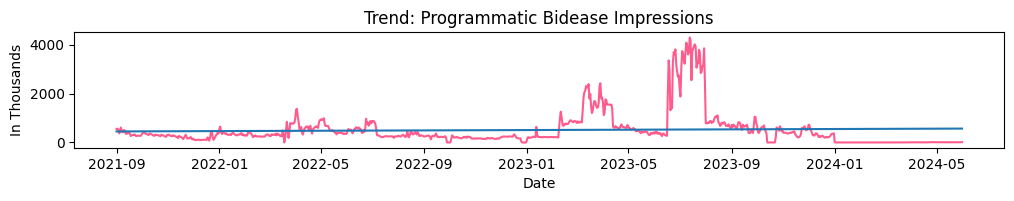

Preload_Digital_Turbine_Spend


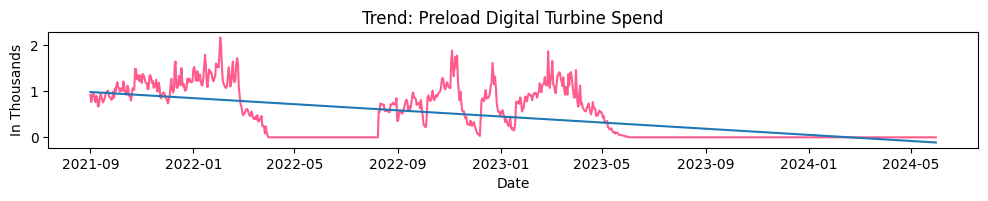

Preload_Digital_Turbine_launches


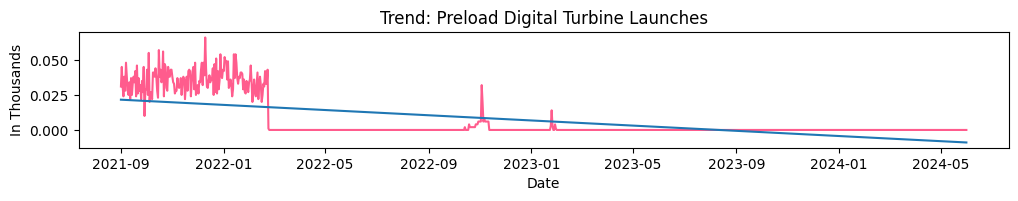

Preload_Digital_Turbine_impressions


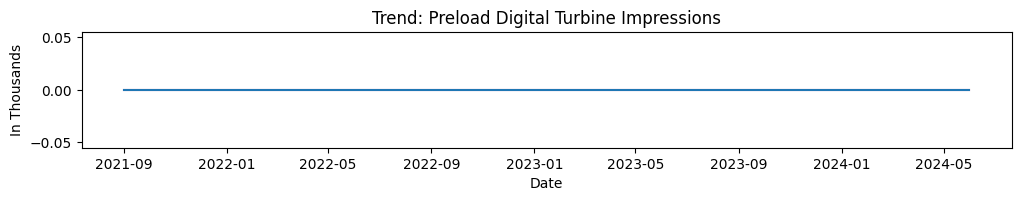

Preload_Digital_Turbine_app_downloads


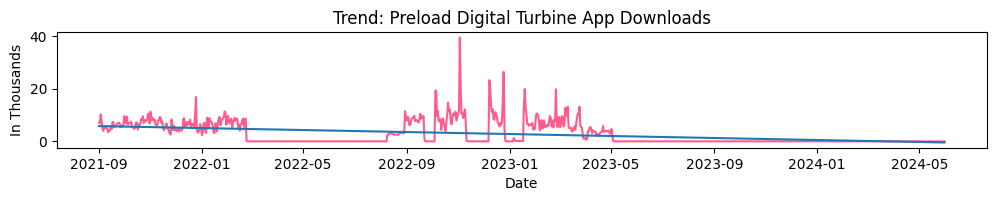

Programmatic_Tapjoy_Spend


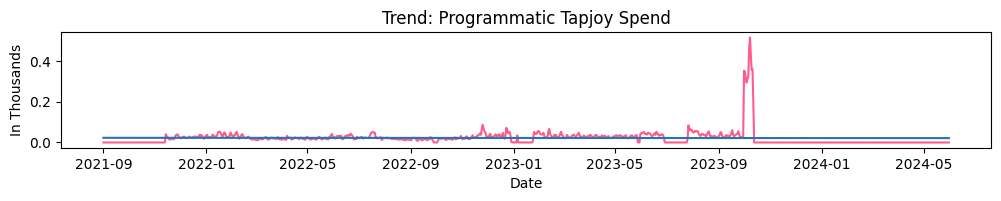

Programmatic_Tapjoy_Clicks


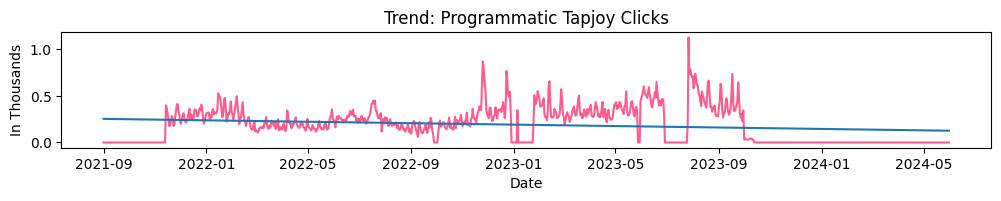

Programmatic_Tapjoy_Impressions


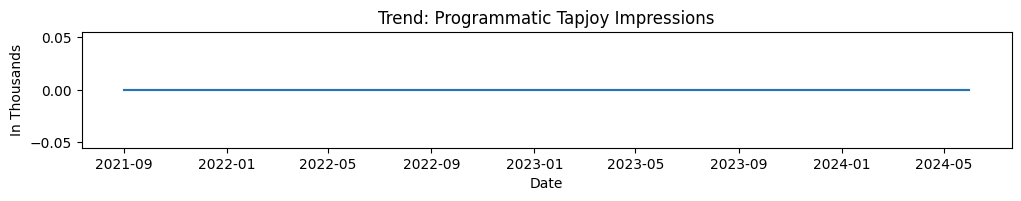

SEM_Apple_Search_Ads_Spend


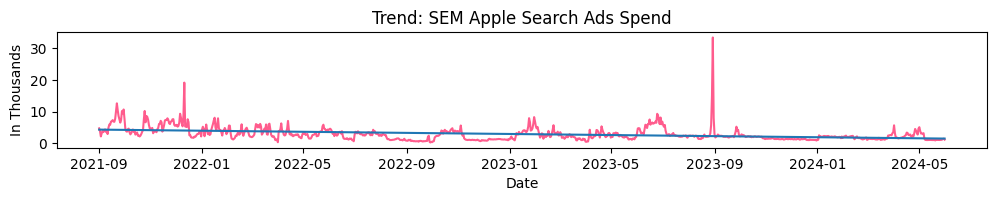

SEM_Apple_Search_Ads_Clicks


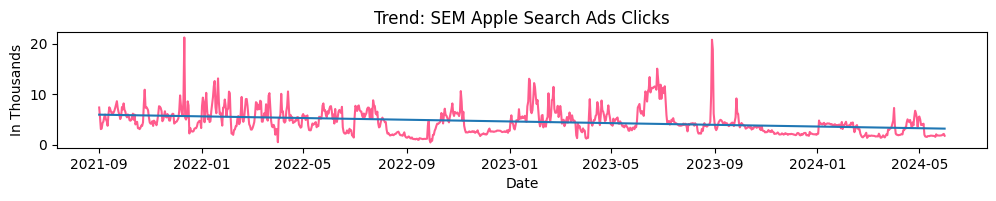

SEM_Apple_Search_Ads_Impressions


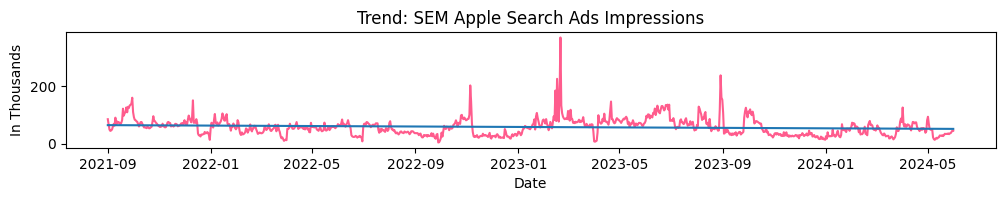

Programmatic_LiftOff_Spend


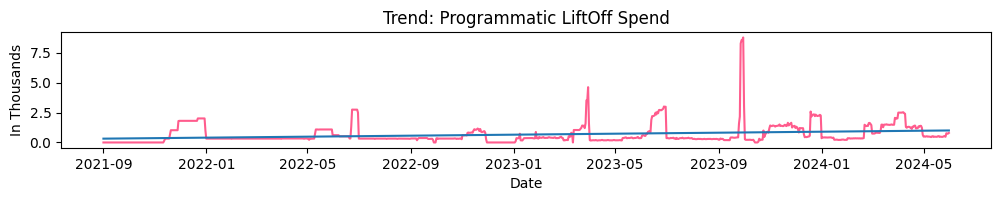

Programmatic_LiftOff_Clicks


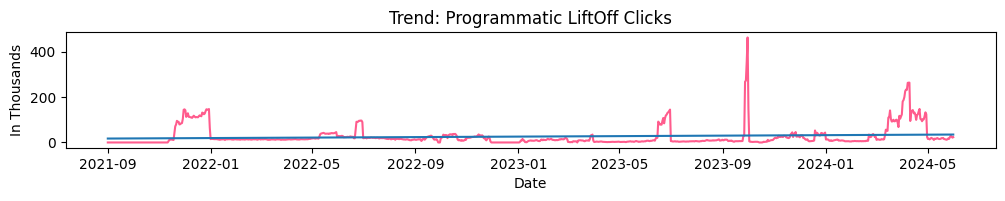

Programmatic_LiftOff_Impressions


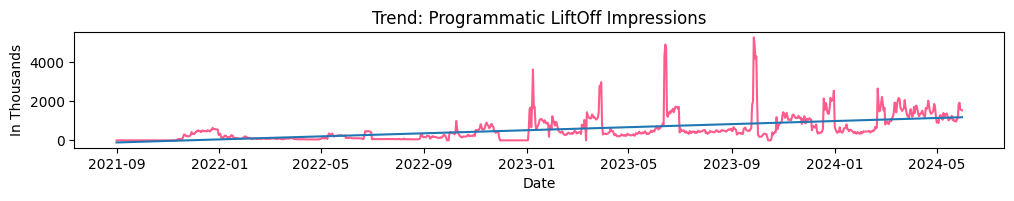

Programmatic_IronSource_Sonic_Spend


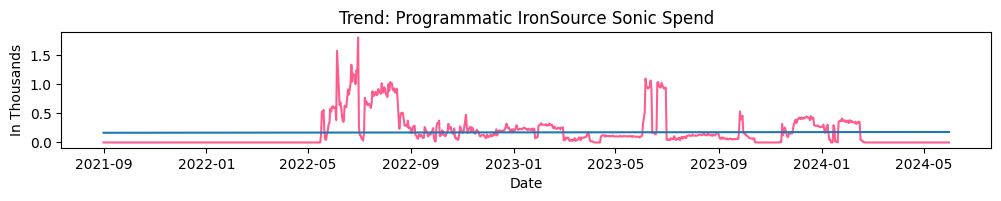

Programmatic_IronSource_Sonic_Clicks


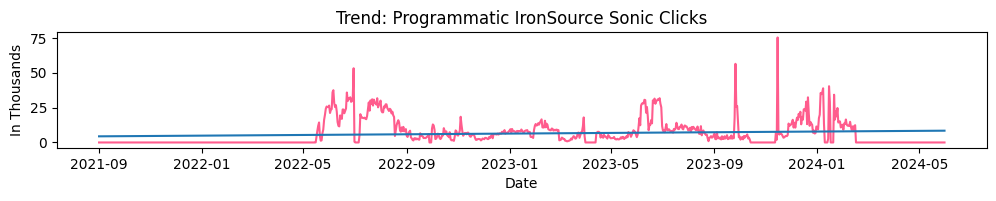

Programmatic_IronSource_Sonic_Impressions


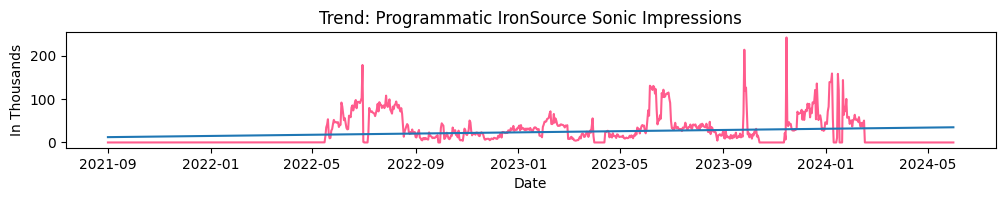

PaidSocial_Twitter_Spend


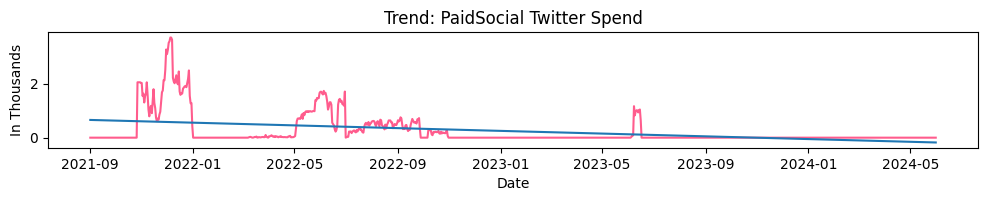

PaidSocial_Twitter_Clicks


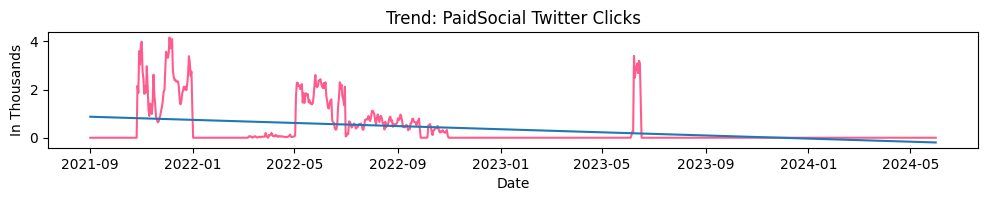

PaidSocial_Twitter_Impressions


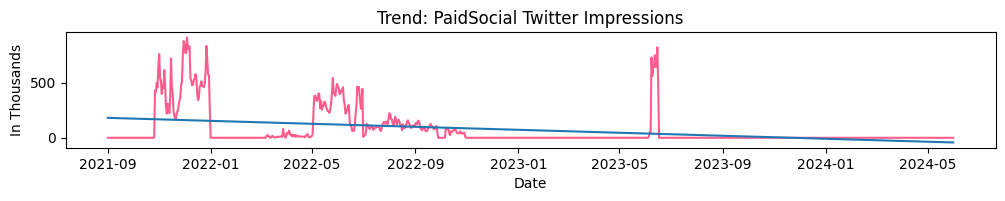

Programmatic_TikTok_Spend


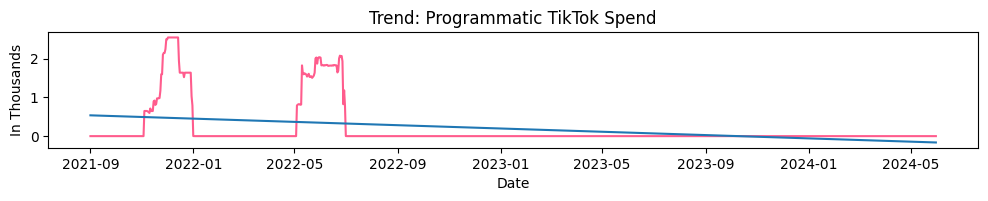

Programmatic_TikTok_Clicks


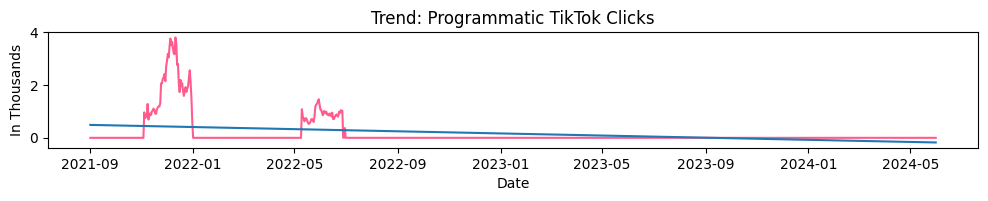

Programmatic_TikTok_Impressions


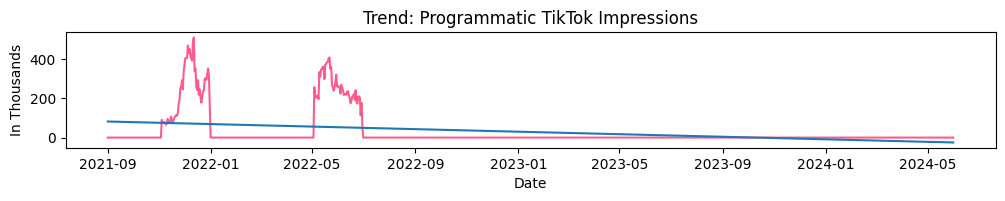

PaidSocial_Vibe_Spend


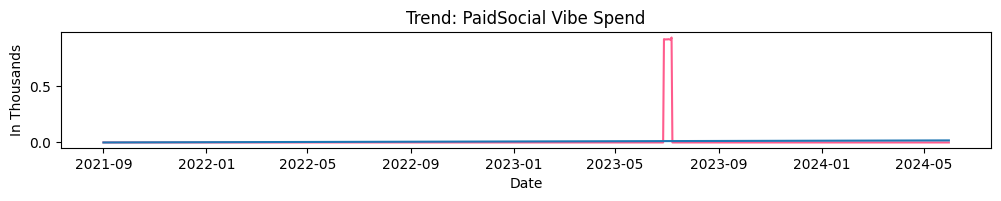

PaidSocial_Vibe_Clicks


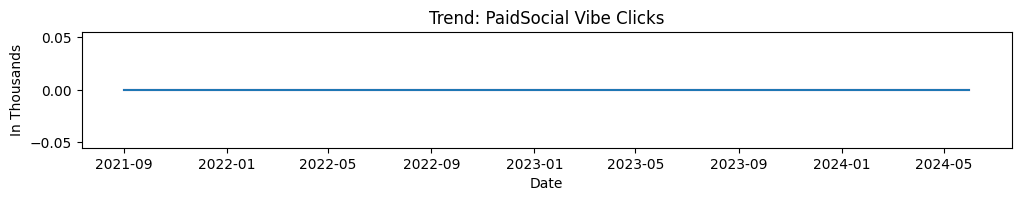

PaidSocial_Vibe_Impressions


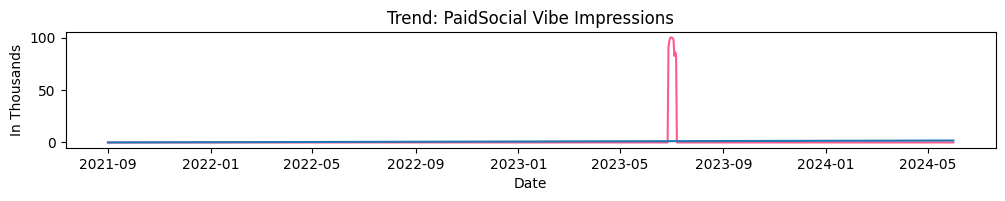

Programmatic_Persona.ly_Spend


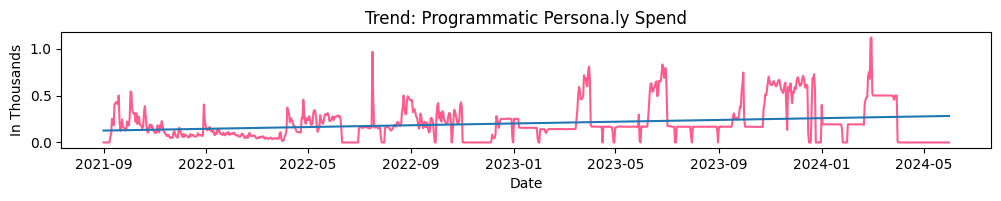

Programmatic_Persona.ly_Clicks


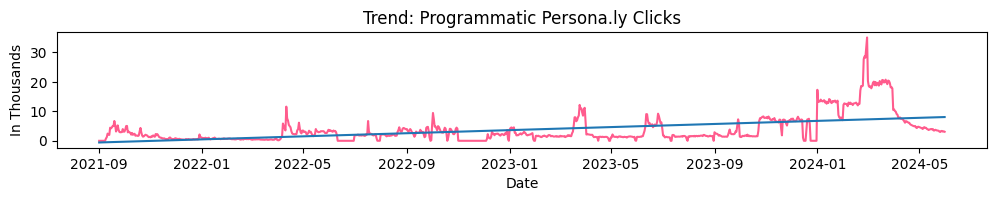

Programmatic_Persona.ly_Impressions


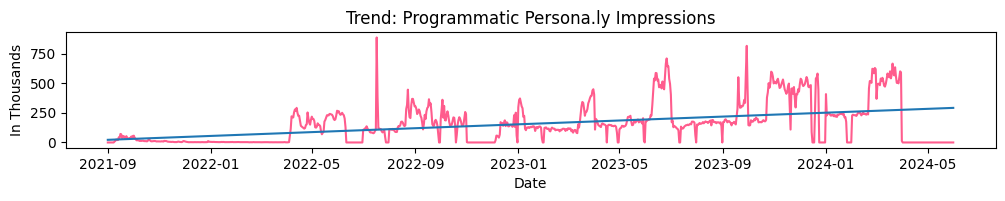

Twitter & TikTok Combined Spend


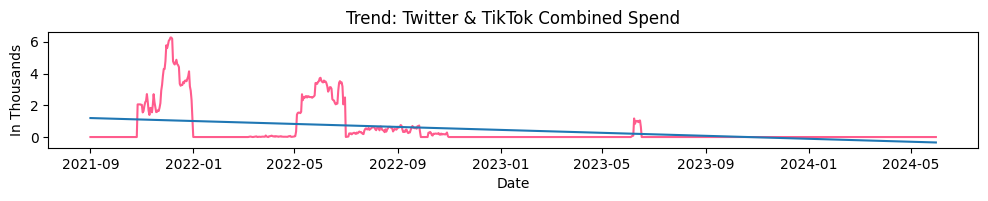

Twitter & TikTok Combined Clicks


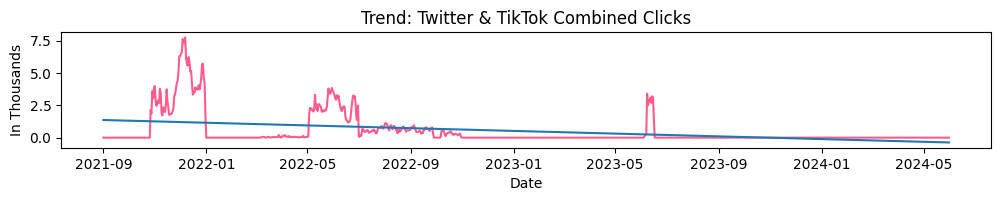

Twitter & TikTok Combined Impressions


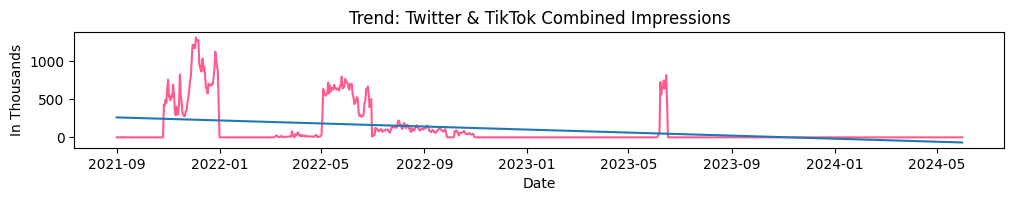

In [121]:
cols_to_plot = [
    'SEM_Google_Spend', 'SEM_Google_Clicks', 'SEM_Google_Impressions', 
    'Preload_IronSource_Aura_Spend', 'Preload_IronSource_Aura_launches', 
    'Preload_IronSource_Aura_impressions', 'Preload_IronSource_Aura_app_downloads', 
    'Programmatic_Bidease_Spend', 'Programmatic_Bidease_Clicks', 
    'Programmatic_Bidease_Impressions', 'Preload_Digital_Turbine_Spend', 
    'Preload_Digital_Turbine_launches', 'Preload_Digital_Turbine_impressions', 
    'Preload_Digital_Turbine_app_downloads', 'Programmatic_Tapjoy_Spend', 
    'Programmatic_Tapjoy_Clicks', 'Programmatic_Tapjoy_Impressions', 
    'SEM_Apple_Search_Ads_Spend', 'SEM_Apple_Search_Ads_Clicks', 
    'SEM_Apple_Search_Ads_Impressions', 'Programmatic_LiftOff_Spend', 
    'Programmatic_LiftOff_Clicks', 'Programmatic_LiftOff_Impressions', 
    'Programmatic_IronSource_Sonic_Spend', 'Programmatic_IronSource_Sonic_Clicks', 
    'Programmatic_IronSource_Sonic_Impressions', 'PaidSocial_Twitter_Spend', 
    'PaidSocial_Twitter_Clicks', 'PaidSocial_Twitter_Impressions', 
    'Programmatic_TikTok_Spend', 'Programmatic_TikTok_Clicks', 
    'Programmatic_TikTok_Impressions', 'PaidSocial_Vibe_Spend', 
    'PaidSocial_Vibe_Clicks', 'PaidSocial_Vibe_Impressions', 
    'Programmatic_Persona.ly_Spend', 'Programmatic_Persona.ly_Clicks', 
    'Programmatic_Persona.ly_Impressions', 'Twitter & TikTok Combined Spend', 
    'Twitter & TikTok Combined Clicks', 'Twitter & TikTok Combined Impressions'
]

# Titles for the plots (same length as cols_to_plot)
plot_titles = [
    'SEM Google Spend', 'SEM Google Clicks', 'SEM Google Impressions', 
    'Preload IronSource Aura Spend', 'Preload IronSource Aura Launches', 
    'Preload IronSource Aura Impressions', 'Preload IronSource Aura App Downloads', 
    'Programmatic Bidease Spend', 'Programmatic Bidease Clicks', 
    'Programmatic Bidease Impressions', 'Preload Digital Turbine Spend', 
    'Preload Digital Turbine Launches', 'Preload Digital Turbine Impressions', 
    'Preload Digital Turbine App Downloads', 'Programmatic Tapjoy Spend', 
    'Programmatic Tapjoy Clicks', 'Programmatic Tapjoy Impressions', 
    'SEM Apple Search Ads Spend', 'SEM Apple Search Ads Clicks', 
    'SEM Apple Search Ads Impressions', 'Programmatic LiftOff Spend', 
    'Programmatic LiftOff Clicks', 'Programmatic LiftOff Impressions', 
    'Programmatic IronSource Sonic Spend', 'Programmatic IronSource Sonic Clicks', 
    'Programmatic IronSource Sonic Impressions', 'PaidSocial Twitter Spend', 
    'PaidSocial Twitter Clicks', 'PaidSocial Twitter Impressions', 
    'Programmatic TikTok Spend', 'Programmatic TikTok Clicks', 
    'Programmatic TikTok Impressions', 'PaidSocial Vibe Spend', 
    'PaidSocial Vibe Clicks', 'PaidSocial Vibe Impressions', 
    'Programmatic Persona.ly Spend', 'Programmatic Persona.ly Clicks', 
    'Programmatic Persona.ly Impressions', 'Twitter & TikTok Combined Spend', 
    'Twitter & TikTok Combined Clicks', 'Twitter & TikTok Combined Impressions'
]


# Call the trend_chart_2 function with the DataFrame and the list of columns
trend_chart_2(df_useracq, cols_to_plot, plot_titles, 'Date')


SEM_Google_Impressions


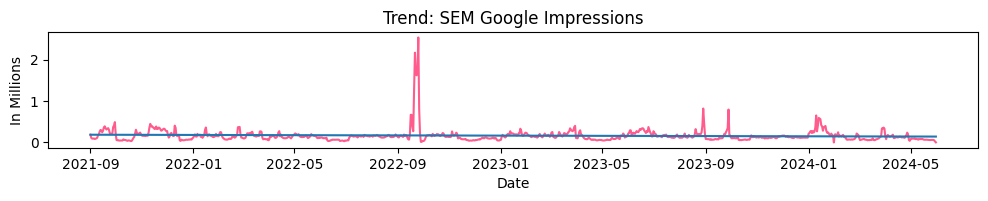

Programmatic_Bidease_Clicks


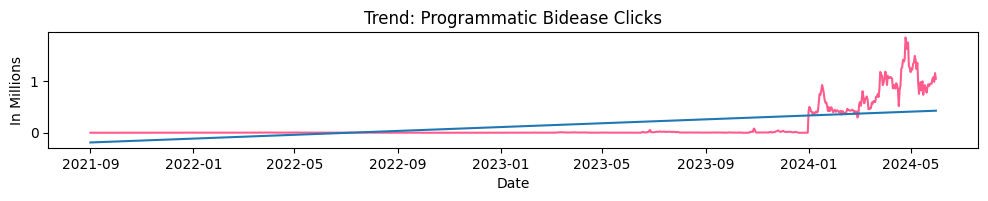

Programmatic_Bidease_Impressions


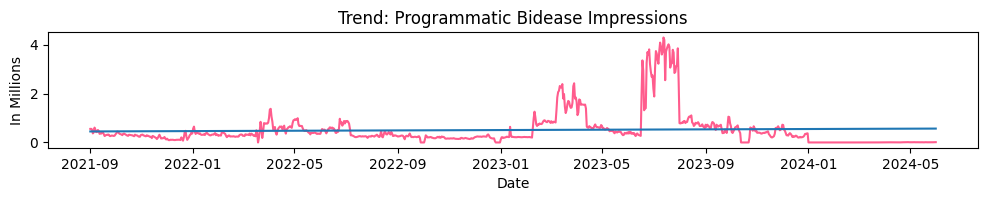

Programmatic_LiftOff_Impressions


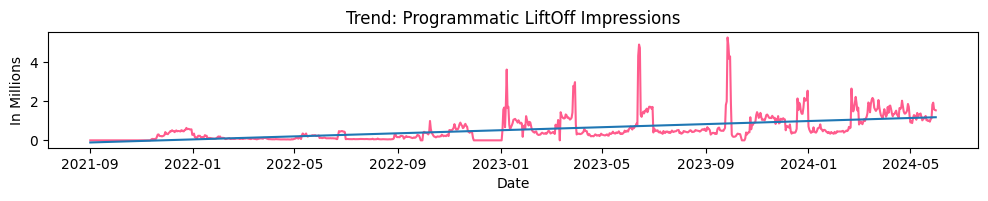

Twitter & TikTok Combined Impressions


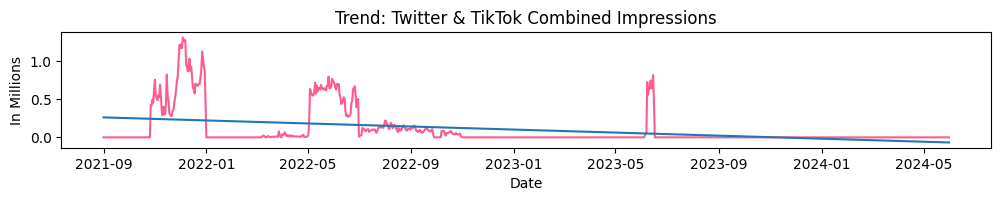

In [240]:
cols_to_plot = [
    'SEM_Google_Impressions', 
    'Programmatic_Bidease_Clicks', 
    'Programmatic_Bidease_Impressions', 
    'Programmatic_LiftOff_Impressions', 
    'Twitter & TikTok Combined Impressions'
]

# Titles for the plots (same length as cols_to_plot)
plot_titles = [
    'SEM Google Impressions', 
    'Programmatic Bidease Clicks', 
    'Programmatic Bidease Impressions', 
    'Programmatic LiftOff Impressions', 
    'Twitter & TikTok Combined Impressions'
]


# Call the trend_chart_2 function with the DataFrame and the list of columns
trend_chart_2(df_useracq, cols_to_plot, plot_titles, 'Date')


In [196]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

def thousands_formatter(x, pos):
    return f'{x / 1e3:,.0f}'

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_=df_.sort_values(by='Date')
    temp=df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date':date_range})
    df_=pd.merge(df_,df_temp_flag,on='Date',how='outer')
    for idx, var in  enumerate(cols):
        print(var)
        df_=df_.fillna(0).reset_index(drop=True)
        plt.figure(figsize=(12, 1.5))
        var_ = var+"_"
        df_[var_] = [val / 1e3 for val in df_[var]]
        df_=df_.sort_values(by='Date')
        sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)
#         sns.regplot(data=df_, x=date_var, y=var, color='#ff5c8d', scatter_kws={'s': 100})
        y = [val / 1e3 for val in df_[var]]
#         y = [val / 1e6 for val in var]
        x = np.arange(len(df_.index))  # Use numerical index as x for regression calculation
#        y = df_[var]
#        print(x)
#        print(y)
        m, b = np.polyfit(x, y, 1)
        plt.plot(df_['Date'], m*x + b)
        pd.DataFrame(df_['Date'], m*x + b).to_clipboard()
        plt.title('Trend: '+chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("In Thousands")
        plt.grid(False)
        plt.show()

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_ = df_.sort_values(by='Date')
    
    temp = df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date': date_range})
    df_ = pd.merge(df_, df_temp_flag, on='Date', how='outer')
    
    for idx, var in enumerate(cols):
        plt.figure(figsize=(12, 1.5))  # Adjust figsize for a better visual
        
        sns.lineplot(data=df_, x=date_var, y=var, color='#ff5c8d', ci=None)
        sns.regplot(data=df_, x=date_var, y=var, scatter=False, color='#ff5c8d')
        
        plt.title('Trend: ' + chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("Value")
        plt.grid(False)
        plt.show()


In [197]:
df_influ = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Influencer data.xlsx")

In [198]:
df_influ = df_influ.fillna(0)

In [249]:
df_influ.to_clipboard()

Spend


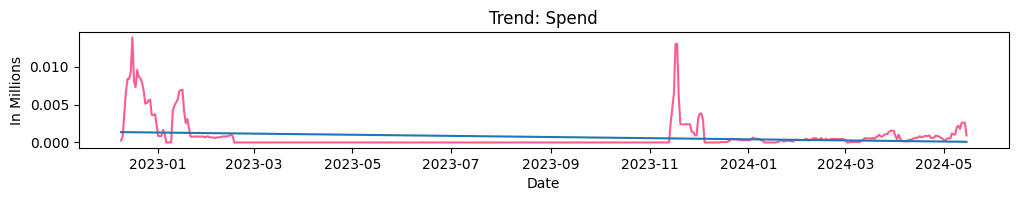

Daily Imp


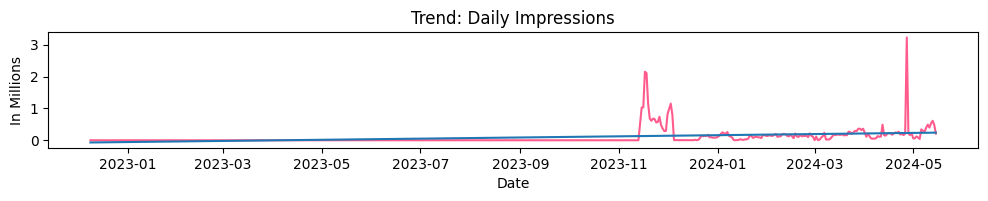

In [239]:
cols_to_plot = [
    'Spend','Daily Imp'
]

# Titles for the plots (same length as cols_to_plot)
plot_titles = [
    'Spend','Daily Impressions'
]


# Call the trend_chart_2 function with the DataFrame and the list of columns
trend_chart_2(df_influ, cols_to_plot, plot_titles, 'Date')


In [247]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

def thousands_formatter(x, pos):
    return f'{x / 1e3:,.0f}'

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_=df_.sort_values(by='Date')
    temp=df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date':date_range})
    df_=pd.merge(df_,df_temp_flag,on='Date',how='outer')
    for idx, var in  enumerate(cols):
        print(var)
        df_=df_.fillna(0).reset_index(drop=True)
        plt.figure(figsize=(12, 1.5))
        var_ = var+"_"
        df_[var_] = [val / 1e3 for val in df_[var]]
        df_=df_.sort_values(by='Date')
        sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)
#         sns.regplot(data=df_, x=date_var, y=var, color='#ff5c8d', scatter_kws={'s': 100})
        y = [val / 1e3 for val in df_[var]]
#         y = [val / 1e6 for val in var]
        x = np.arange(len(df_.index))  # Use numerical index as x for regression calculation
#        y = df_[var]
#        print(x)
#        print(y)
        m, b = np.polyfit(x, y, 1)
        plt.plot(df_['Date'], m*x + b)
        pd.DataFrame(df_['Date'], m*x + b).to_clipboard()
        plt.title('Trend: '+chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("In Thousands")
        plt.grid(False)
        plt.show()

In [161]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'  # Formats the number in millions with one decimal place

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_ = df_.sort_values(by='Date')
    
    temp = df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date': date_range})
    df_ = pd.merge(df_, df_temp_flag, on='Date', how='outer')
    
    for idx, var in enumerate(cols):
        plt.figure(figsize=(12, 6))  # Adjust figsize for a better visual
        var_ = var + "_"
        df_[var_] = df_[var] / 1e6  # Convert data to millions
        
        sns.lineplot(data=df_, x=date_var, y=var_, color='#ff5c8d', ci=None)
        
        plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))  # Format y-axis in millions
        
        plt.title('Trend: ' + chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("In Millions")
        plt.grid(False)
        plt.show()


In [167]:
df_brand = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Brand spend and impressions latest.xlsx")

In [168]:
df_brand = df_brand.fillna(0)

In [169]:
df_brand.columns

Index(['Date', 'Brand_Impressions', 'Brand_Spend'], dtype='object')

Brand_Impressions


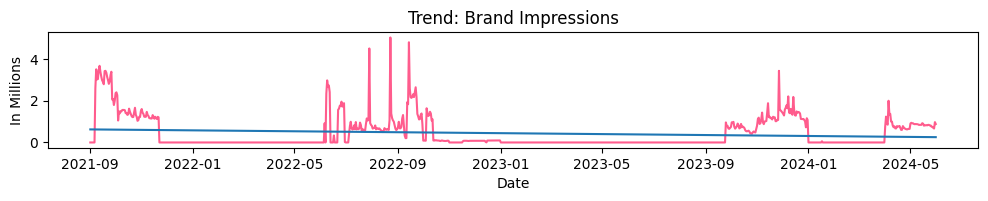

Brand_Spend


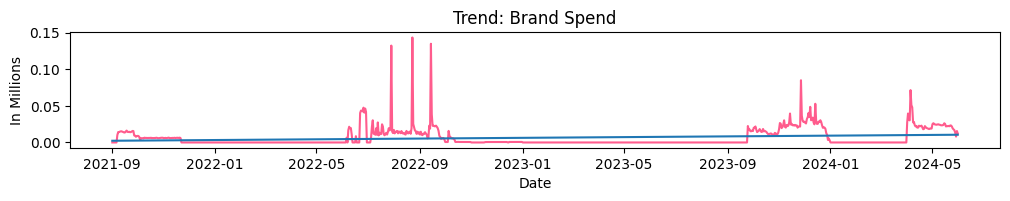

In [238]:
cols_to_plot = [
    'Brand_Impressions', 'Brand_Spend'
]

# Titles for the plots (same length as cols_to_plot)
plot_titles = [
    'Brand Impressions', 'Brand Spend'
]


# Call the trend_chart_2 function with the DataFrame and the list of columns
trend_chart_2(df_brand, cols_to_plot, plot_titles, 'Date')


In [208]:
df_organic = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Organic google.xlsx")

In [209]:
df_organic = df_organic.fillna(0)

In [210]:
df_organic

,Date,Clicks,Impressions,CTR,Position
0,2022-06-18,1170413,13946440.0,0.0839,4.08
1,2022-06-19,1032753,12619736.0,0.0818,4.23
2,2022-06-20,1242471,14116111.0,0.0880,4.14
3,2022-06-21,1370173,15460041.0,0.0886,3.94
4,2022-06-22,1664328,17467173.0,0.0953,3.83
...,...,...,...,...,...
999,2022-06-13,1514761,0.0,0.0000,3.93
1000,2022-06-14,1311544,0.0,0.0000,3.93
1001,2022-06-15,1319363,0.0,0.0000,3.93
1002,2022-06-16,1424733,0.0,0.0000,3.93


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

def thousands_formatter(x, pos):
    return f'{x / 1e3:,.0f}'

def trend_chart_2(df_, cols, chart_title, date_var):
    df_['Date'] = pd.to_datetime(df_['Date'])
    df_=df_.sort_values(by='Date')
    temp=df_.copy()
    min_date = temp[date_var].min()
    max_date = temp[date_var].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D')
    df_temp_flag = pd.DataFrame({'Date':date_range})
    df_=pd.merge(df_,df_temp_flag,on='Date',how='outer')
    for idx, var in  enumerate(cols):
        print(var)
        df_=df_.fillna(0).reset_index(drop=True)
        plt.figure(figsize=(12, 1.5))
        var_ = var+"_"
        df_[var_] = [val / 1e6 for val in df_[var]]
        df_=df_.sort_values(by='Date')
        sns.lineplot(data= df_, x=date_var, y=var_, color='#ff5c8d',ci=None)
#         sns.regplot(data=df_, x=date_var, y=var, color='#ff5c8d', scatter_kws={'s': 100})
        y = [val / 1e6 for val in df_[var]]
#         y = [val / 1e6 for val in var]
        x = np.arange(len(df_.index))  # Use numerical index as x for regression calculation
#        y = df_[var]
#        print(x)
#        print(y)
        m, b = np.polyfit(x, y, 1)
        plt.plot(df_['Date'], m*x + b)
        pd.DataFrame(df_['Date'], m*x + b).to_clipboard()
        plt.title('Trend: '+chart_title[idx])
        plt.xlabel(date_var)
        plt.ylabel("In Millions")
        plt.grid(False)
        plt.show()

Clicks


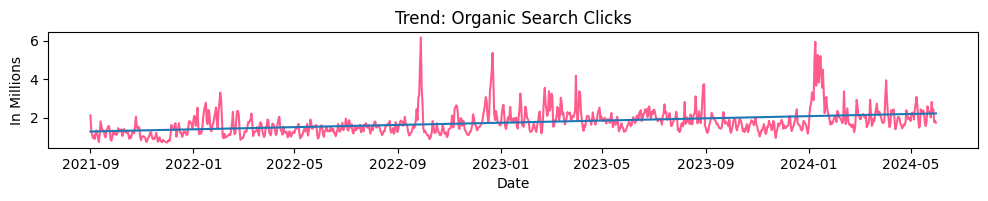

Position


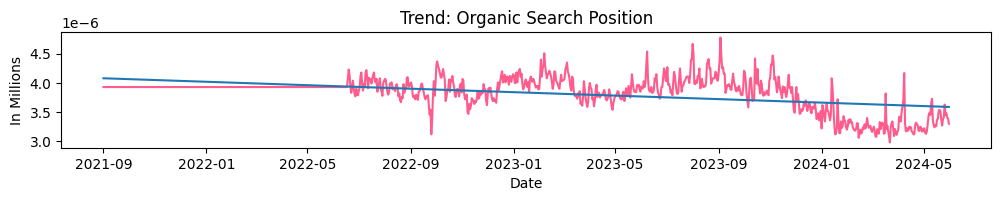

In [237]:
cols_to_plot = [
    'Clicks', 'Position'
]

# Titles for the plots (same length as cols_to_plot)
plot_titles = [
    'Organic Search Clicks', 'Organic Search Position'
]


# Call the trend_chart_2 function with the DataFrame and the list of columns
trend_chart_2(df_organic, cols_to_plot, plot_titles, 'Date')


In [242]:
df_soc = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Social Media Latest.xlsx")

In [243]:
df_soc = df_soc.fillna(0)

In [245]:
df_soc.columns

Index(['Date', 'SocialEng_Facebook_Impressions',
       'SocialEng_Facebook_Total_Engagements',
       'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions',
       'SocialEng_LinkedIn_Total_Engagements',
       'SocialEng_LinkedIn_Estimated_Clicks', 'SocialEng_YouTube_Impressions',
       'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Impressions',
       'SocialEng_Instagram_Total_Engagements',
       'SocialEng_Instagram_Estimated_Clicks', 'SocialEng_Twitter_Impressions',
       'SocialEng_Twitter_Total_Engagements',
       'SocialEng_Twitter_Estimated_Clicks', 'SocialEng_TikTok_Impressions',
       'SocialEng_TikTok_Total_Engagements'],
      dtype='object')

SocialEng_Facebook_Impressions


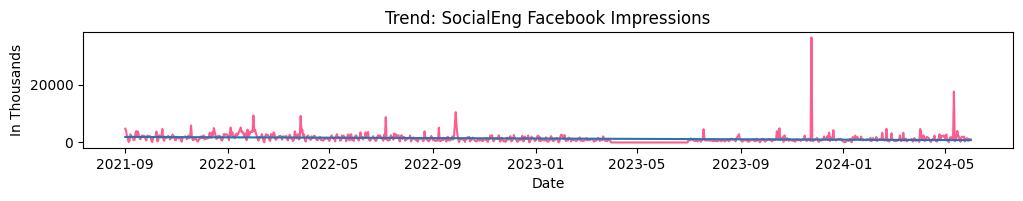

SocialEng_Facebook_Total_Engagements


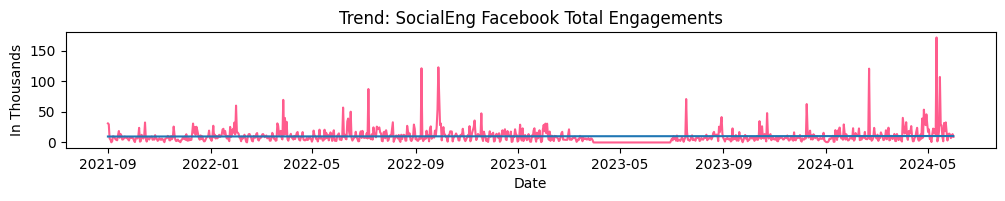

SocialEng_Facebook_Estimated_Clicks


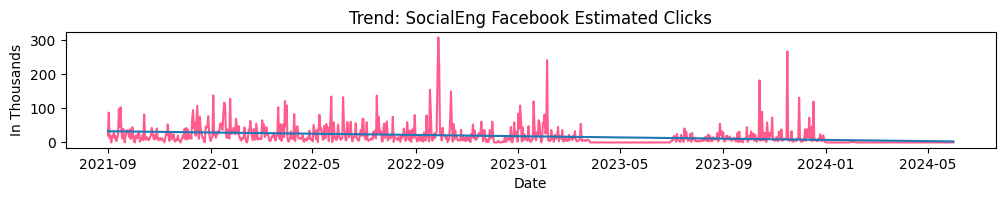

SocialEng_LinkedIn_Impressions


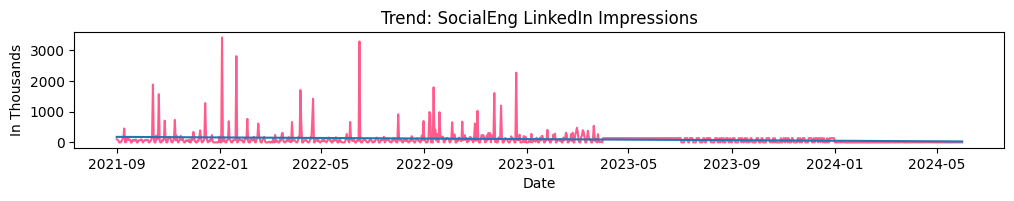

SocialEng_LinkedIn_Total_Engagements


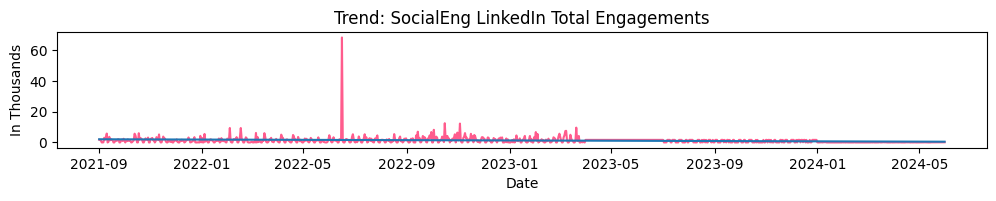

SocialEng_LinkedIn_Estimated_Clicks


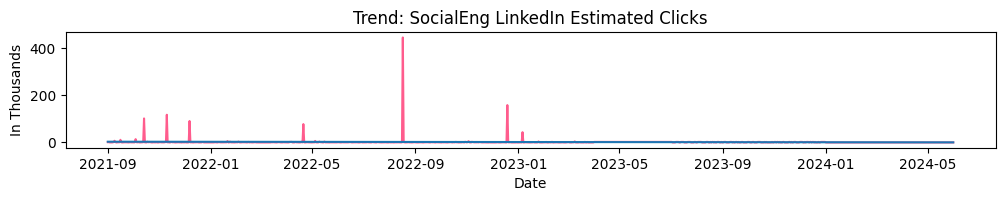

SocialEng_YouTube_Impressions


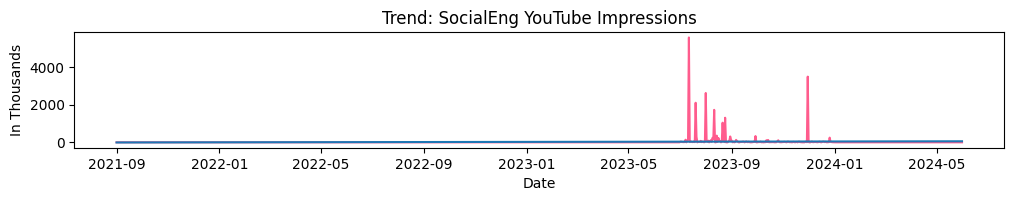

SocialEng_YouTube_Estimated_Clicks


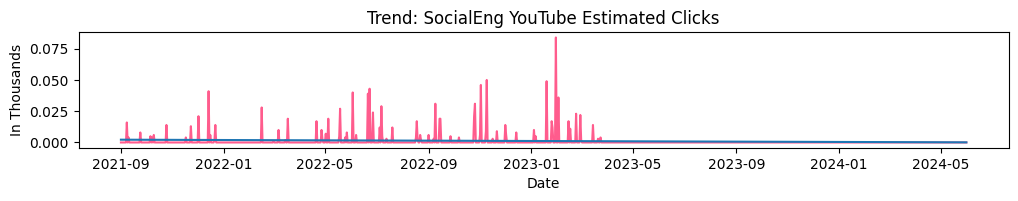

SocialEng_Instagram_Impressions


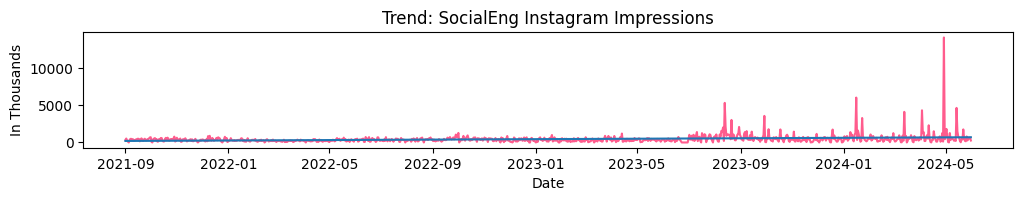

SocialEng_Instagram_Total_Engagements


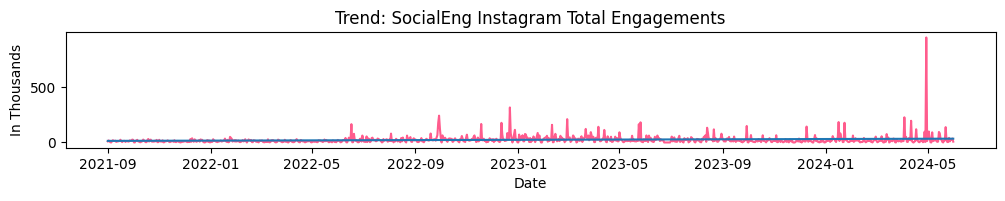

SocialEng_Instagram_Estimated_Clicks


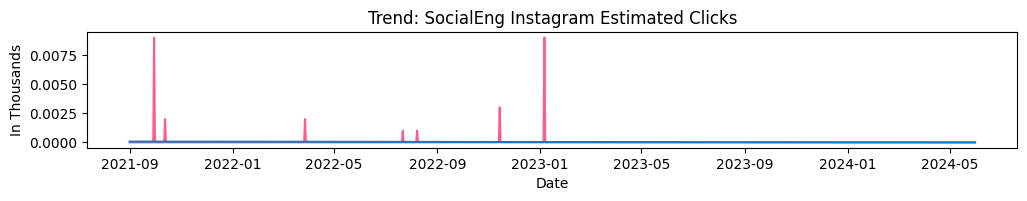

SocialEng_Twitter_Impressions


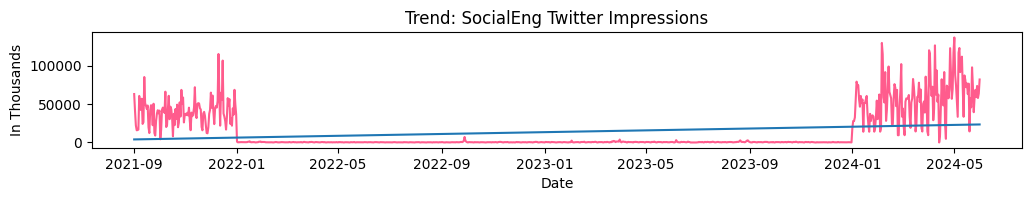

SocialEng_Twitter_Total_Engagements


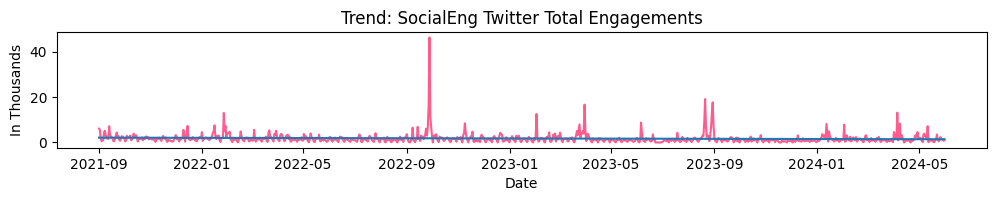

SocialEng_Twitter_Estimated_Clicks


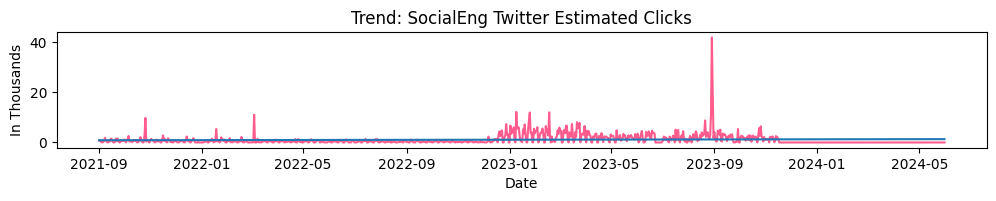

SocialEng_TikTok_Impressions


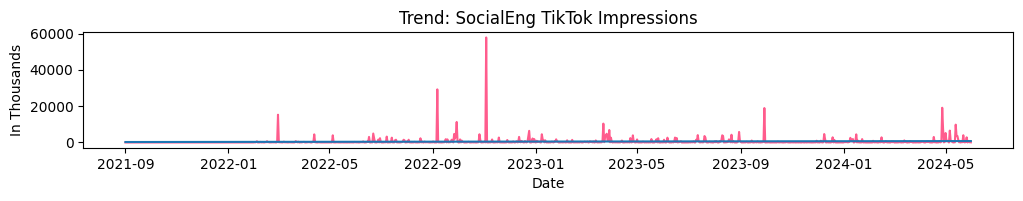

SocialEng_TikTok_Total_Engagements


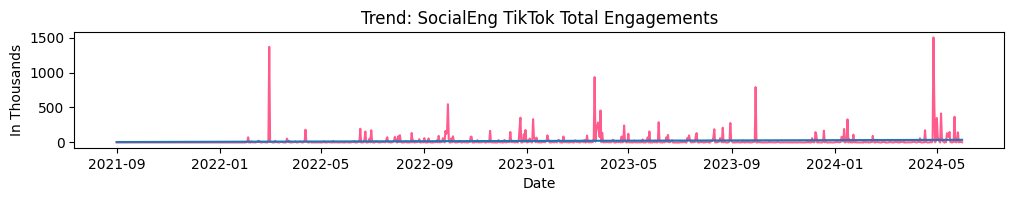

In [248]:
cols_to_plot = [
    'SocialEng_Facebook_Impressions',
       'SocialEng_Facebook_Total_Engagements',
       'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions',
       'SocialEng_LinkedIn_Total_Engagements',
       'SocialEng_LinkedIn_Estimated_Clicks', 'SocialEng_YouTube_Impressions',
       'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Impressions',
       'SocialEng_Instagram_Total_Engagements',
       'SocialEng_Instagram_Estimated_Clicks', 'SocialEng_Twitter_Impressions',
       'SocialEng_Twitter_Total_Engagements',
       'SocialEng_Twitter_Estimated_Clicks', 'SocialEng_TikTok_Impressions',
       'SocialEng_TikTok_Total_Engagements'
]

# Titles for the plots (same length as cols_to_plot)
plot_titles = [
    'SocialEng Facebook Impressions',
       'SocialEng Facebook Total Engagements',
       'SocialEng Facebook Estimated Clicks', 'SocialEng LinkedIn Impressions',
       'SocialEng LinkedIn Total Engagements',
       'SocialEng LinkedIn Estimated Clicks', 'SocialEng YouTube Impressions',
       'SocialEng YouTube Estimated Clicks', 'SocialEng Instagram Impressions',
       'SocialEng Instagram Total Engagements',
       'SocialEng Instagram Estimated Clicks', 'SocialEng Twitter Impressions',
       'SocialEng Twitter Total Engagements',
       'SocialEng Twitter Estimated Clicks', 'SocialEng TikTok Impressions',
       'SocialEng TikTok Total Engagements'
]


# Call the trend_chart_2 function with the DataFrame and the list of columns
trend_chart_2(df_soc, cols_to_plot, plot_titles, 'Date')
